<a href="https://colab.research.google.com/github/AWO112233/Data-Merging-for-3300-data/blob/main/MaywoodsDataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Preprocessing

In [ ]:
#Use
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Use
#Parsing data into Dataframe
BookOcc = pd.read_csv('Maywood_data_BookOccId.csv')

/tmp/ipython-input-3111811320.py:2: DtypeWarning: Columns (26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  BookOcc = pd.read_csv('Maywood_data_BookOccId.csv')


In [ ]:
ind = [26, 27]
cols = BookOcc.columns[ind]
print(cols)

Index(['AvailabilitySearch_BookingPlaced', 'AvailabilitySearch_RecurrentBooking'], dtype='object')


In [ ]:
#Use NO OF COLUNMS
#lenght of columns
tcols = BookOcc.columns.tolist()
len(tcols)

63

In [ ]:
#Use
#Printing Column Names
print(tcols)

['BookingOccasion_Id', 'BookingOccasion_BookingId', 'BookingOccasion_StartDateTime', 'BookingOccasion_EndDateTime', 'BookingOccasion_BookingOccasionStateId', 'BookingOccasion_CancellationReasonId', 'BookingOccasion_StartDate', 'CancellationReason_Id', 'CancellationReason_ReasonText', 'CancellationReason_StartDate', 'BookingOccasionState_Title', 'Booking_BookingStateId', 'BookingState_Title', 'Booking_BookingAuthorisationStatusId', 'Booking_BookableUnitId', 'Booking_BookedOnBehalfOfSomeoneElse', 'Booking_ExternalBooking', 'Booking_BookingTypeId', 'Booking_TeamId', 'BookingType_Title', 'BookingState_Title.1', 'BookingAuthorisationStatus_Title', 'AvailabilitySearch_SearchMadeAt', 'AvailabilitySearch_DateTime', 'AvailabilitySearch_Duration', 'AvailabilitySearch_Capacity', 'AvailabilitySearch_BookingPlaced', 'AvailabilitySearch_RecurrentBooking', 'AvailabilitySearch_BookableUnitTypeId', 'Team_Active', 'Team_Title', 'Service_Id', 'Service_Active', 'Service_BusinessDeliveryUnitId', 'Service_T

In [ ]:
#Use
#Selecting required columns for Analysis
inds = ['BookingOccasion_Id', 'BookingOccasion_BookingId', 'BookingOccasion_StartDateTime', 'BookingOccasion_EndDateTime', 'BookingOccasion_BookingOccasionStateId',
        'CancellationReason_Id', 'CancellationReason_ReasonText', 'CancellationReason_StartDate',
        'BookingOccasionState_Title', 'Booking_BookingStateId', 'BookingState_Title',
        'Booking_BookedOnBehalfOfSomeoneElse', 'Booking_ExternalBooking', 'Booking_BookingTypeId', 'Booking_TeamId', 'BookingType_Title',
         'AvailabilitySearch_SearchMadeAt',  'AvailabilitySearch_Capacity',
         'AvailabilitySearch_RecurrentBooking', 'Team_Active', 'Team_Title', 'Service_Id', 'Service_Active',
         'Service_Title', 'BusinessDeliveryUnit_Id', 'BusinessDeliveryUnit_Active', 'BusinessDeliveryUnit_Title', 'BookableUnit_Id',
        'BookableUnit_Active', 'BookableUnit_Capacity', 'BookableUnit_BookableUnitTypeId', 'BookableUnit_IsClinical', 'BookableUnit_IsPartitioned', 'BookableUnit_IsVirtual',
        'BookableUnit_Title', 'BookableUnitType_Title', 'Equipment_Title', 'Area_Id', 'Area_BuildingId', 'Area_Active', 'Area_Title',
        'BuildingOpeningHours_IsOpen', 'BuildingOpeningHours_OpeningTime', 'BuildingOpeningHours_ClosingTime', 'Building_Active', 'Building_Title',
        'District_Title', 'Person_Id', 'PersonBooking_Id']
#Creating new df with reqiured columns
book_df = BookOcc[inds]


In [ ]:
#Use
#Number of columns remaining for analysis dataframe
tcols = book_df.columns.tolist()
len(tcols)

49

In [ ]:
#Use
#Number of Bookings
book_df['BookingOccasion_Id'].nunique()

1050568

In [ ]:
#Safe data to local machine
#book_df.to_csv('book_df.csv', index =False)

Feature Engineering. creating new columns.

In [ ]:
#Use
#create a new column for the time component.
book_df['MeetStart_Time'] = book_df['BookingOccasion_StartDateTime'].str.split(' ').str[1]
book_df['MeetEnd_Time'] = book_df['BookingOccasion_EndDateTime'].str.split(' ').str[1]

#Remove time component from original columns (leave date)
book_df.loc[:,'BookingOccasion_StartDateTime'] = book_df['BookingOccasion_StartDateTime'].str.split(' ').str[0]
book_df.loc[:,'BookingOccasion_EndDateTime'] = book_df['BookingOccasion_EndDateTime'].str.split(' ').str[0]
book_df.loc[:,'CancellationReason_StartDate'] = book_df['CancellationReason_StartDate'].str.split(' ').str[0]
book_df.loc[:,'AvailabilitySearch_SearchMadeAt'] = book_df['AvailabilitySearch_SearchMadeAt'].str.split(' ').str[0]


AttributeError: Can only use .str accessor with string values!

In [ ]:
#Use
#Confirming Results .head()
book_df[['BookingOccasion_StartDateTime', 'BookingOccasion_EndDateTime', 'CancellationReason_StartDate', 'AvailabilitySearch_SearchMadeAt','MeetStart_Time', 'MeetEnd_Time']].head(20)

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,BookingOccasion_StartDateTime,BookingOccasion_EndDateTime,CancellationReason_StartDate,AvailabilitySearch_SearchMadeAt,MeetStart_Time,MeetEnd_Time
0,2016-06-06,2016-06-06,NaN,31/05/2016,12:00:00,12:30:00
1,2016-06-06,2016-06-06,NaN,31/05/2016,12:00:00,12:30:00
2,2016-06-07,2016-06-07,NaN,31/05/2016,12:00:00,12:30:00
3,2016-06-08,2016-06-08,NaN,31/05/2016,12:00:00,15:30:00
4,2016-06-09,2016-06-09,NaN,31/05/2016,12:00:00,14:30:00
5,2016-06-10,2016-06-10,NaN,31/05/2016,12:00:00,12:30:00
6,2016-06-11,2016-06-11,NaN,31/05/2016,12:00:00,12:30:00
7,2016-06-12,2016-06-12,NaN,31/05/2016,12:00:00,14:30:00
8,2016-06-13,2016-06-13,NaN,31/05/2016,12:00:00,12:30:00
9,2016-06-14,2016-06-14,NaN,31/05/2016,12:00:00,15:30:00


In [ ]:
#Use put in chaning datatpe section
# Converting date columns to Datatime datatype
book_df['BookingOccasion_StartDateTime'] = pd.to_datetime(book_df['BookingOccasion_StartDateTime'], errors='coerce')
book_df['BookingOccasion_EndDateTime'] = pd.to_datetime(book_df['BookingOccasion_EndDateTime'], errors='coerce')
book_df['CancellationReason_StartDate'] = pd.to_datetime(book_df['CancellationReason_StartDate'], errors='coerce')

# AvailabilitySearch_SearchMadeAt is in DD/MM/YYYY format, hence dayfirst=True
book_df['AvailabilitySearch_SearchMadeAt'] = pd.to_datetime(book_df['AvailabilitySearch_SearchMadeAt'], dayfirst=True, errors='coerce')

# Converting MeetStart_Time and MeetEnd_Time to time objects
book_df['MeetStart_Time'] = pd.to_datetime(book_df['MeetStart_Time'], format='%H:%M:%S', errors='coerce').dt.time
book_df['MeetEnd_Time'] = pd.to_datetime(book_df['MeetEnd_Time'], format='%H:%M:%S', errors='coerce').dt.time


/tmp/ipython-input-3249751167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_df['BookingOccasion_StartDateTime'] = pd.to_datetime(book_df['BookingOccasion_StartDateTime'], errors='coerce')
/tmp/ipython-input-3249751167.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_df['BookingOccasion_EndDateTime'] = pd.to_datetime(book_df['BookingOccasion_EndDateTime'], errors='coerce')
/tmp/ipython-input-3249751167.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) wa

In [ ]:
#Use meeting duration
# Combine date + time to create full datetime columns
book_df['MeetStart_DateTime'] = pd.to_datetime(
    book_df['BookingOccasion_StartDateTime'].astype(str) + ' ' + book_df['MeetStart_Time'].astype(str),
    errors='coerce'
)

book_df['MeetEnd_DateTime'] = pd.to_datetime(
    book_df['BookingOccasion_EndDateTime'].astype(str) + ' ' + book_df['MeetEnd_Time'].astype(str),
    errors='coerce'
)

#Calculate duration, creating variale MeetDur
book_df['MeetDur'] = book_df['MeetEnd_DateTime'] - book_df['MeetStart_DateTime']

#   duration in minutes
book_df['MeetDur_minutes'] = book_df['MeetDur'].dt.total_seconds() / 60

# Drop temporary combined datetime columns
book_df.drop(columns=['MeetStart_DateTime', 'MeetEnd_DateTime', 'MeetDur'], inplace=True)


/tmp/ipython-input-2700962674.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_df['MeetStart_DateTime'] = pd.to_datetime(
/tmp/ipython-input-2700962674.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_df['MeetEnd_DateTime'] = pd.to_datetime(
/tmp/ipython-input-2700962674.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [ ]:
#Use in changeing data type section
#Converting to neccesary variables to categorycal
book_df[['BookingOccasion_Id','BookingOccasion_BookingId', 'BookingOccasion_BookingOccasionStateId']] = book_df[['BookingOccasion_Id','BookingOccasion_BookingId', 'BookingOccasion_BookingOccasionStateId']].astype('category')
book_df[['CancellationReason_Id', 'CancellationReason_ReasonText', 'BookingOccasionState_Title']] = book_df[['CancellationReason_Id', 'CancellationReason_ReasonText', 'BookingOccasionState_Title']].astype('category')
book_df[['BookingState_Title', 'Booking_BookingTypeId', 'Booking_BookingStateId']] = book_df[['BookingState_Title', 'Booking_BookingTypeId', 'Booking_BookingStateId']].astype('category')
book_df[['BookingType_Title', 'Team_Title', 'Service_Id', 'Service_Title']] = book_df[['BookingType_Title', 'Team_Title', 'Service_Id', 'Service_Title']].astype('category')
book_df[['BusinessDeliveryUnit_Id', 'BusinessDeliveryUnit_Title', 'BookableUnit_Id', 'BookableUnit_BookableUnitTypeId']] = book_df[['BusinessDeliveryUnit_Id', 'BusinessDeliveryUnit_Title', 'BookableUnit_Id', 'BookableUnit_BookableUnitTypeId']].astype('category')
book_df[['BookableUnit_Title', 'BookableUnitType_Title', 'Area_Id', 'Area_BuildingId']] = book_df[['BookableUnit_Title', 'BookableUnitType_Title', 'Area_Id', 'Area_BuildingId']].astype('category')
book_df[['Area_Title', 'Building_Title', 'District_Title', 'Person_Id', 'PersonBooking_Id']] = book_df[['Area_Title', 'Building_Title', 'District_Title', 'Person_Id', 'PersonBooking_Id']].astype('category')

/tmp/ipython-input-2537289418.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_df[['BookingOccasion_Id','BookingOccasion_BookingId', 'BookingOccasion_BookingOccasionStateId']] = book_df[['BookingOccasion_Id','BookingOccasion_BookingId', 'BookingOccasion_BookingOccasionStateId']].astype('category')
/tmp/ipython-input-2537289418.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_df[['CancellationReason_Id', 'CancellationReason_ReasonText', 'BookingOccasionState_Title']] = book_df[['CancellationR

In [ ]:
#Use in changeing data type section
#Converting to neccesary variables to Boolean (Note: They contain NAs so converting them replaced NA with TRUE)
book_df[['Booking_BookedOnBehalfOfSomeoneElse', 'Booking_ExternalBooking', 'AvailabilitySearch_RecurrentBooking', 'Team_Active', 'Service_Active', 'BusinessDeliveryUnit_Active', 'Building_Active', 'BuildingOpeningHours_IsOpen' ]] = book_df[['Booking_BookedOnBehalfOfSomeoneElse', 'Booking_ExternalBooking', 'AvailabilitySearch_RecurrentBooking', 'Team_Active', 'Service_Active', 'BusinessDeliveryUnit_Active', 'Building_Active', 'BuildingOpeningHours_IsOpen']].astype(bool)

/tmp/ipython-input-1953554849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_df[['Booking_BookedOnBehalfOfSomeoneElse', 'Booking_ExternalBooking', 'AvailabilitySearch_RecurrentBooking', 'Team_Active', 'Service_Active', 'BusinessDeliveryUnit_Active', 'Building_Active', 'BuildingOpeningHours_IsOpen' ]] = book_df[['Booking_BookedOnBehalfOfSomeoneElse', 'Booking_ExternalBooking', 'AvailabilitySearch_RecurrentBooking', 'Team_Active', 'Service_Active', 'BusinessDeliveryUnit_Active', 'Building_Active', 'BuildingOpeningHours_IsOpen']].astype(bool)


In [ ]:
#Use in feature engineering
#Extracting Day, Month, Year, Dayofweek from BookingOcc_Date
book_df['BoookOcc_Day'] = book_df['BookingOccasion_StartDateTime'].dt.day
book_df['BoookOcc_Month'] = book_df['BookingOccasion_StartDateTime'].dt.month
book_df['BoookOcc_year'] = book_df['BookingOccasion_StartDateTime'].dt.year
book_df['BoookOcc_DayofWeek'] = book_df['BookingOccasion_StartDateTime'].dt.dayofweek


/tmp/ipython-input-2891432135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_df['BoookOcc_Day'] = book_df['BookingOccasion_StartDateTime'].dt.day
/tmp/ipython-input-2891432135.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_df['BoookOcc_Month'] = book_df['BookingOccasion_StartDateTime'].dt.month
/tmp/ipython-input-2891432135.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [ ]:
#Viewing Result
book_df[['BookingOccasion_StartDateTime', 'BookingOccasion_EndDateTime', 'CancellationReason_StartDate', 'AvailabilitySearch_SearchMadeAt', 'MeetStart_Time', 'MeetEnd_Time', 'BoookOcc_Day', 'BoookOcc_Month', 'BoookOcc_year', 'BoookOcc_DayofWeek', 'MeetDur_minutes' ]].head(10)

,BookingOccasion_StartDateTime,BookingOccasion_EndDateTime,CancellationReason_StartDate,AvailabilitySearch_SearchMadeAt,MeetStart_Time,MeetEnd_Time,BoookOcc_Day,BoookOcc_Month,BoookOcc_year,BoookOcc_DayofWeek,MeetDur_minutes
0,2016-06-06,2016-06-06,NaT,2016-05-31,12:00:00,12:30:00,6,6,2016,0,30.0
1,2016-06-06,2016-06-06,NaT,2016-05-31,12:00:00,12:30:00,6,6,2016,0,30.0
2,2016-06-07,2016-06-07,NaT,2016-05-31,12:00:00,12:30:00,7,6,2016,1,30.0
3,2016-06-08,2016-06-08,NaT,2016-05-31,12:00:00,15:30:00,8,6,2016,2,210.0
4,2016-06-09,2016-06-09,NaT,2016-05-31,12:00:00,14:30:00,9,6,2016,3,150.0
5,2016-06-10,2016-06-10,NaT,2016-05-31,12:00:00,12:30:00,10,6,2016,4,30.0
6,2016-06-11,2016-06-11,NaT,2016-05-31,12:00:00,12:30:00,11,6,2016,5,30.0
7,2016-06-12,2016-06-12,NaT,2016-05-31,12:00:00,14:30:00,12,6,2016,6,150.0
8,2016-06-13,2016-06-13,NaT,2016-05-31,12:00:00,12:30:00,13,6,2016,0,30.0
9,2016-06-14,2016-06-14,NaT,2016-05-31,12:00:00,15:30:00,14,6,2016,1,210.0


In [ ]:
#Use in feature engeenring
# Creating a mapping from weekday number to name
day_map = {
    0: 'Mon',
    1: 'Tue',
    2: 'Wed',
    3: 'Thu',
    4: 'Fri',
    5: 'Sat',
    6: 'Sun'
};

month_map = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

# Apply the mapping
book_df['BoCC_Days'] = book_df['BoookOcc_DayofWeek'].map(day_map)
book_df['BoCC_Month'] = book_df['BoookOcc_Month'].map(month_map)

#Convert neccessary newly engineered variables to Categorical
book_df[['BoookOcc_Day', 'BoookOcc_Month', 'BoookOcc_year', 'BoookOcc_DayofWeek', 'BoCC_Days', 'BoCC_Month']] = book_df[['BoookOcc_Day', 'BoookOcc_Month', 'BoookOcc_year', 'BoookOcc_DayofWeek', 'BoCC_Days', 'BoCC_Month']].astype('category')


/tmp/ipython-input-615439483.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_df['BoCC_Days'] = book_df['BoookOcc_DayofWeek'].map(day_map)
/tmp/ipython-input-615439483.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_df['BoCC_Month'] = book_df['BoookOcc_Month'].map(month_map)
/tmp/ipython-input-615439483.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [ ]:
#Confirming Results
book_df[['BoCC_Days', 'BoCC_Month']].head()

,BoCC_Days,BoCC_Month
0,Mon,Jun
1,Mon,Jun
2,Tue,Jun
3,Wed,Jun
4,Thu,Jun


In [ ]:
#Use in changeing data type section as confirming data type result
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050568 entries, 0 to 1050567
Data columns (total 58 columns):
 #   Column                                  Non-Null Count    Dtype         
---  ------                                  --------------    -----         
 0   BookingOccasion_Id                      1050568 non-null  category      
 1   BookingOccasion_BookingId               1050568 non-null  category      
 2   BookingOccasion_StartDateTime           1050568 non-null  datetime64[ns]
 3   BookingOccasion_EndDateTime             1050568 non-null  datetime64[ns]
 4   BookingOccasion_BookingOccasionStateId  1050568 non-null  category      
 5   CancellationReason_Id                   196231 non-null   category      
 6   CancellationReason_ReasonText           196231 non-null   category      
 7   CancellationReason_StartDate            196231 non-null   datetime64[ns]
 8   BookingOccasionState_Title              1050568 non-null  category      
 9   Booking_BookingStateId  

Drooping inactive Booakble units

In [ ]:
#Confirming if there are none active buildings
book_df['Building_Active'].value_counts()

,count
Building_Active,
True,1050568


In [ ]:
#use for bookable unit that are active or not
book_df['BookableUnit_Active'].value_counts()


,count
BookableUnit_Active,
True,999257
False,51311


In [ ]:
#use
#Where Bookable unit is not active, save into a dataframe
Fal_unit = book_df[book_df['BookableUnit_Active'] == False ]

In [ ]:
#use
#droping where unit is not active using index leaving only Active Bookable unit
book_df =  book_df[~book_df.index.isin(Fal_unit.index)]

Checking if there are Negative Booking date and dropping them for data cleanininess

In [ ]:
#Calculate the booking lead time (as timedelta)
book_df['BookingLeadTime'] = book_df['BookingOccasion_StartDateTime'] - book_df['AvailabilitySearch_SearchMadeAt']


In [ ]:
#use
negative_rows = book_df[book_df['BookingLeadTime'] < pd.Timedelta(0)]

negative_rows


,BookingOccasion_Id,BookingOccasion_BookingId,BookingOccasion_StartDateTime,BookingOccasion_EndDateTime,BookingOccasion_BookingOccasionStateId,CancellationReason_Id,CancellationReason_ReasonText,CancellationReason_StartDate,BookingOccasionState_Title,Booking_BookingStateId,...,MeetStart_Time,MeetEnd_Time,MeetDur_minutes,BoookOcc_Day,BoookOcc_Month,BoookOcc_year,BoookOcc_DayofWeek,BoCC_Days,BoCC_Month,BookingLeadTime
183,238,86,2016-08-29,2016-08-29,1,NaN,NaN,NaT,Active,0,...,10:00:00,13:30:00,210.0,29,8,2016,0,Mon,Aug,-3 days
78131,85453,63394,2017-10-27,2017-10-27,4,NaN,NaN,NaT,Draft,3,...,11:30:00,13:00:00,90.0,27,10,2017,4,Fri,Oct,-4 days
84786,92108,65405,2017-11-06,2017-11-06,2,1.0,Cancelled by User,2016-05-17,Cancelled,0,...,16:30:00,17:00:00,30.0,6,11,2017,0,Mon,Nov,-10 days
132429,139751,96498,2017-04-06,2017-04-06,1,NaN,NaN,NaT,Active,0,...,09:00:00,12:00:00,180.0,6,4,2017,3,Thu,Apr,-448 days
133239,140561,97153,2018-04-25,2018-04-25,1,NaN,NaN,NaT,Active,0,...,12:00:00,13:00:00,60.0,25,4,2018,2,Wed,Apr,-71 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042155,1104624,425308,2025-02-17,2025-02-17,3,NaN,NaN,NaT,Replaced By Edit,2,...,09:00:00,17:00:00,480.0,17,2,2025,0,Mon,Feb,-32 days
1042156,1104625,425308,2025-02-24,2025-02-24,3,NaN,NaN,NaT,Replaced By Edit,2,...,09:00:00,17:00:00,480.0,24,2,2025,0,Mon,Feb,-25 days
1042157,1104626,425308,2025-03-03,2025-03-03,3,NaN,NaN,NaT,Replaced By Edit,2,...,09:00:00,17:00:00,480.0,3,3,2025,0,Mon,Mar,-18 days
1042158,1104627,425308,2025-03-10,2025-03-10,3,NaN,NaN,NaT,Replaced By Edit,2,...,09:00:00,17:00:00,480.0,10,3,2025,0,Mon,Mar,-11 days


In [ ]:
len(negative_rows)

69

In [ ]:
#negative_rows.to_csv('negative_rows.csv', index=False)

In [ ]:
#negative_rows.to_csv('negative_rows.csv', index=False)

In [ ]:
#use
# Drop rows where BookingLeadTime is negative using boolean indexing
book_df1 = book_df[~book_df.index.isin(negative_rows.index)]


**ANALYSIS SECTION**

In [ ]:
#use
#Total number of BookingOcc for active bookable unit
book_df1['BookingOccasion_Id'].nunique()

999188

In [ ]:
#Total mumber of Buildings after droping inactive unit
book_df1['Area_BuildingId'].nunique()

22

In [ ]:
#Total number of Areas after dropping inactive units
book_df1['Area_Id'].nunique()

51

In [ ]:
#Unique number of bookable unit using BookableUnit_Id
book_df1['BookableUnit_Id'].nunique()

352

In [ ]:
#Unique number of bookable unit using BookableUnit_Title
book_df1['BookableUnit_Title'].nunique()

323

In [ ]:
#Number of bookings that are active or Replaced by edits
unique_count = book_df1[book_df1['BookingOccasionState_Title'].isin(['Active', 'Replaced By Edit'])]['BookingOccasion_Id'].nunique()
print(unique_count)

708547


In [ ]:
#use
#Number of bookings that are active
unique_count1 = book_df1[book_df1['BookingOccasionState_Title'].isin(['Active'])]['BookingOccasion_Id'].nunique()
print(unique_count1)

500547


In [ ]:
#use
#Number of bookings that are cancelled
unique_count2 = book_df1[book_df1['BookingOccasionState_Title'].isin(['Cancelled'])]['BookingOccasion_Id'].nunique()
print(unique_count2)

229832


In [ ]:
#use
#Total Bookings, numbers cancelled and cancellation rate
# Step 1: Count total bookings by BookingType_Title
total_counts = book_df1.groupby('BookingType_Title')['BookingOccasion_Id'].count()

#  Count only cancelled bookings
cancelled_counts = book_df1[book_df1['BookingOccasionState_Title'] == 'Cancelled'] \
    .groupby('BookingType_Title')['BookingOccasion_Id'].count()

#  Combine into a DataFrame and compute cancellation rate
cancellation_rate = pd.DataFrame({
    'Total_Bookings': total_counts,
    'Cancelled_Bookings': cancelled_counts
})

# Fill NaNs in Cancelled_Bookings with 0 incase some types may have no cancellations)
cancellation_rate['Cancelled_Bookings'] = cancellation_rate['Cancelled_Bookings'].fillna(0)

#  Calculate the cancellation rate
cancellation_rate['Cancellation_Rate'] = cancellation_rate['Cancelled_Bookings'] / cancellation_rate['Total_Bookings']

# format as percentage
cancellation_rate['Cancellation_Rate'] = cancellation_rate['Cancellation_Rate'] * 100

print(cancellation_rate.sort_values(by='Cancellation_Rate', ascending=False))


                   Total_Bookings  Cancelled_Bookings  Cancellation_Rate
BookingType_Title                                                       
Training                    53022               36339          68.535702
Unknown                      2847                 719          25.254654
Clinical                   576539              127603          22.132588
NonClinical                342616               65171          19.021587


/tmp/ipython-input-3338499423.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = book_df1.groupby('BookingType_Title')['BookingOccasion_Id'].count()
/tmp/ipython-input-3338499423.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('BookingType_Title')['BookingOccasion_Id'].count()


/tmp/ipython-input-1172803803.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


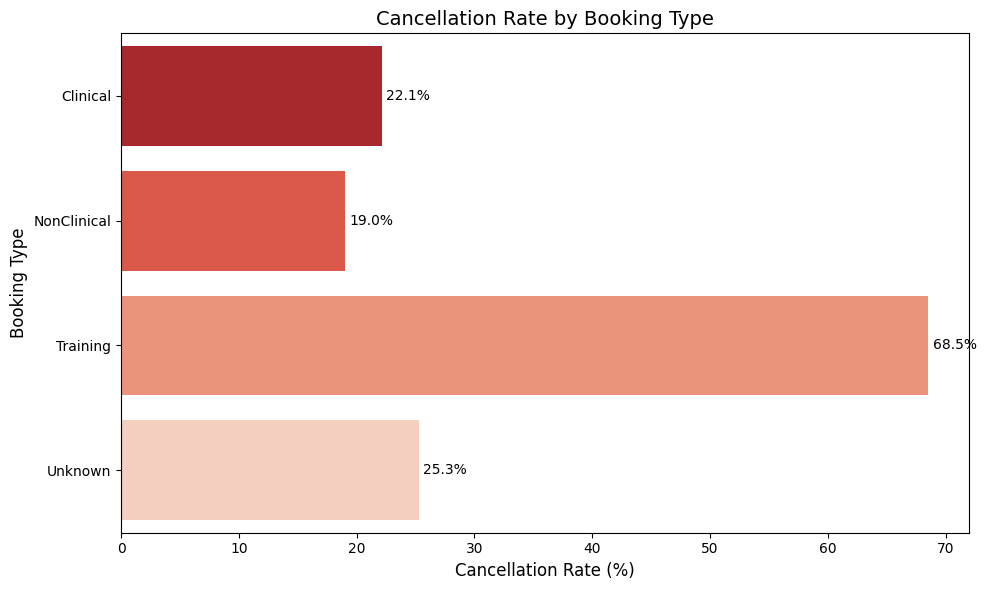

In [ ]:
#The above result visualization

# Sort for better visualisation
cancellation_rate_sorted = cancellation_rate.sort_values(by='Cancellation_Rate', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=cancellation_rate_sorted.reset_index(),
    x='Cancellation_Rate',
    y='BookingType_Title',
    palette='Reds_r'
)

# Add percentage labels to bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", fontsize=10, padding=3)

plt.title("Cancellation Rate by Booking Type", fontsize=14)
plt.xlabel("Cancellation Rate (%)", fontsize=12)
plt.ylabel("Booking Type", fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
#use
#Active bookings by Booking Type Title
#  Count total bookings by BookingType_Title
total_counts = book_df1.groupby('BookingType_Title')['BookingOccasion_Id'].count()

#  Count only active bookings
active_counts = book_df1[book_df1['BookingOccasionState_Title'] == 'Active'] \
    .groupby('BookingType_Title')['BookingOccasion_Id'].count()

#  Combine into a DataFrame and compute active rate
active_rate = pd.DataFrame({
    'Total_Bookings': total_counts,
    'Active_Bookings': active_counts
})

# Fill NaNs in Active_Bookings with 0 inacse some types have no active bookings
active_rate['Active_Bookings'] = active_rate['Active_Bookings'].fillna(0)

# Calculate the active booking rate in percentage
active_rate['Active_Rate'] = active_rate['Active_Bookings'] / active_rate['Total_Bookings'] * 100

# Sort by Active Rate
print(active_rate.sort_values(by='Active_Rate', ascending=False))


/tmp/ipython-input-2494886436.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = book_df1.groupby('BookingType_Title')['BookingOccasion_Id'].count()


                   Total_Bookings  Active_Bookings  Active_Rate
BookingType_Title                                              
Unknown                      2847             1962    68.914647
NonClinical                342616           199932    58.354543
Clinical                   576539           285941    49.596124
Training                    53022            12712    23.974954


/tmp/ipython-input-2494886436.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('BookingType_Title')['BookingOccasion_Id'].count()


/tmp/ipython-input-583063243.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


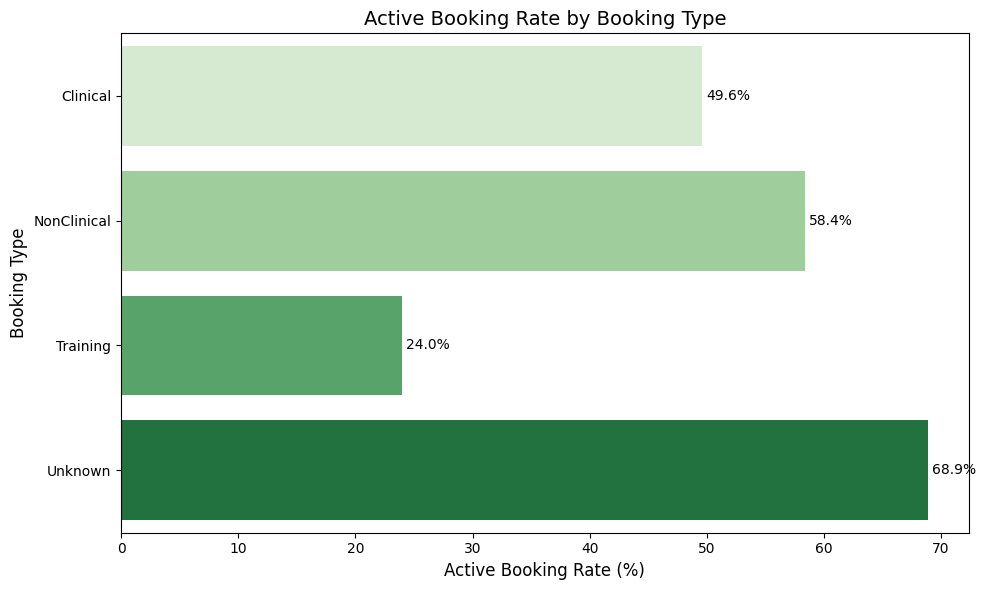

In [ ]:
#The above result visualization

# Sort for better visualisation
active_rate_sorted = active_rate.sort_values(by='Active_Rate', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=active_rate_sorted.reset_index(),
    x='Active_Rate',
    y='BookingType_Title',
    palette='Greens'
)

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", fontsize=10, padding=3)

plt.title("Active Booking Rate by Booking Type", fontsize=14)
plt.xlabel("Active Booking Rate (%)", fontsize=12)
plt.ylabel("Booking Type", fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
#use
#Active bookings by Booking Type Title during COVID
bookings_2020 = book_df1[book_df1['BookingOccasion_StartDateTime'].dt.year == 2020]

#  Count total bookings by BookingType_Title
total_counts_c = bookings_2020.groupby('BookingType_Title')['BookingOccasion_Id'].count()

#  Count only active bookings
active_counts_c = bookings_2020[bookings_2020['BookingOccasionState_Title'] == 'Active'] \
    .groupby('BookingType_Title')['BookingOccasion_Id'].count()

#  Combine into a DataFrame and compute active rate
active_rate_c = pd.DataFrame({
    'Total_Bookings': total_counts_c,
    'Active_Bookings': active_counts_c
})

# Fill NaNs in Active_Bookings with 0 inacse some types have no active bookings
active_rate_c['Active_Bookings'] = active_rate_c['Active_Bookings'].fillna(0)

# Calculate the active booking rate in percentage
active_rate_c['Active_Rate'] = active_rate_c['Active_Bookings'] / active_rate_c['Total_Bookings'] * 100

# Sort by Active Rate
print(active_rate_c.sort_values(by='Active_Rate', ascending=False))


                   Total_Bookings  Active_Bookings  Active_Rate
BookingType_Title                                              
Unknown                       110               87    79.090909
NonClinical                 40634            23077    56.792341
Clinical                    62942            31288    49.709256
Training                    10251             1937    18.895717


/tmp/ipython-input-1752386578.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts_c = bookings_2020.groupby('BookingType_Title')['BookingOccasion_Id'].count()
/tmp/ipython-input-1752386578.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('BookingType_Title')['BookingOccasion_Id'].count()


/tmp/ipython-input-880361301.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


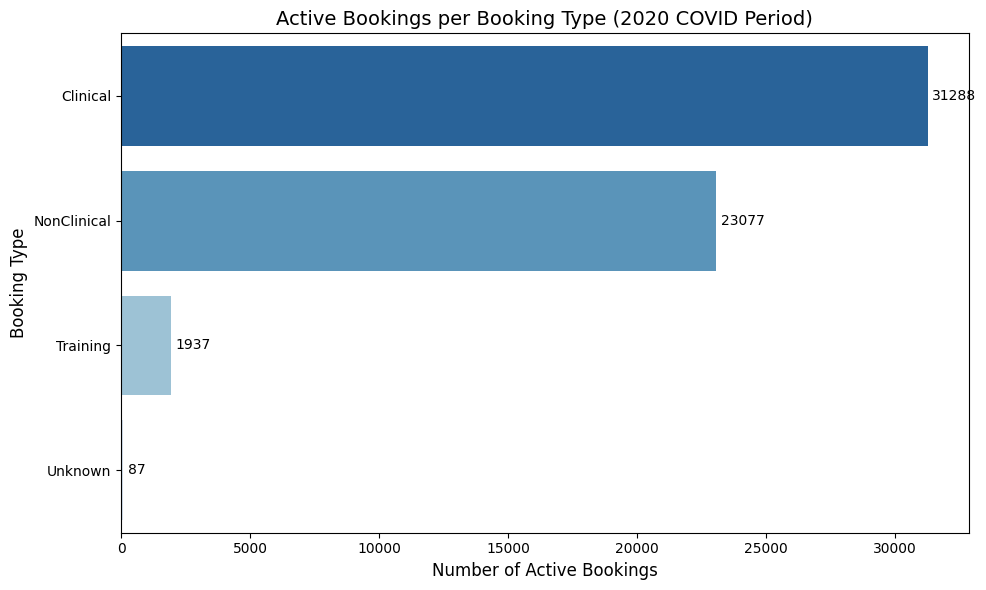

In [ ]:
#The above result visualization

# Sort by Active Bookings
active_rate_c_sorted = active_rate_c.sort_values(by='Active_Bookings', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=active_rate_c_sorted.reset_index(),
    x='Active_Bookings',
    y='BookingType_Title',
    palette='Blues_r'
)

# Add counts to bars
for container in ax.containers:
    ax.bar_label(container, fmt="%d", fontsize=10, padding=3)

plt.title("Active Bookings per Booking Type (2020 COVID Period)", fontsize=14)
plt.xlabel("Number of Active Bookings", fontsize=12)
plt.ylabel("Booking Type", fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
#use
#Notice booking period

#Get the average lead time (as timedelta)
avg_lead_time = book_df1['BookingLeadTime'].mean()
min_lead_time = book_df1['BookingLeadTime'].min()
max_lead_time = book_df1['BookingLeadTime'].max()


print("Average lead time:", avg_lead_time)
print("Minimum lead time:", min_lead_time)
print("Maximum lead time:", max_lead_time)


Average lead time: 128 days 15:22:20.632443808
Minimum lead time: 0 days 00:00:00
Maximum lead time: 729 days 00:00:00


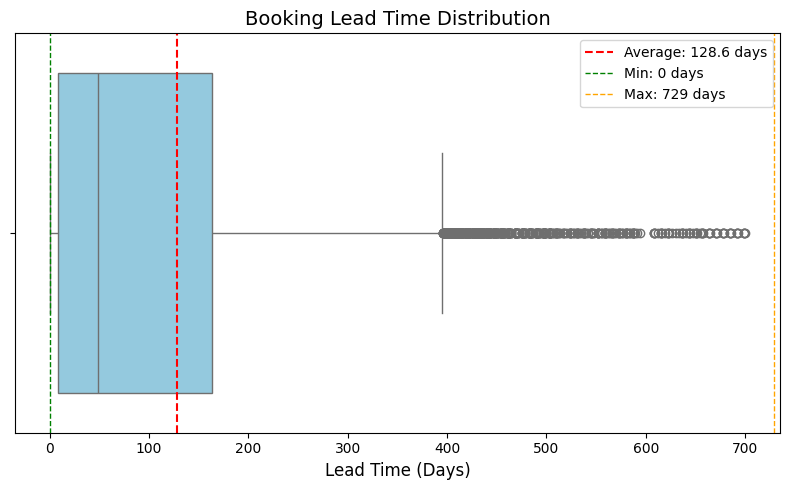

In [ ]:
#The above result visualization
# Convert Timedelta to days
avg_days = avg_lead_time.days + avg_lead_time.seconds / 86400
min_days = min_lead_time.days + min_lead_time.seconds / 86400
max_days = max_lead_time.days + max_lead_time.seconds / 86400

plt.figure(figsize=(8, 5))

# Boxplot
sns.boxplot(
    x=book_df1['BookingLeadTime'].dt.days,
    color='skyblue'
)

# Add vertical lines for avg, min, max
plt.axvline(avg_days, color='red', linestyle='--', linewidth=1.5, label=f'Average: {avg_days:.1f} days')
plt.axvline(min_days, color='green', linestyle='--', linewidth=1, label=f'Min: {min_days:.0f} days')
plt.axvline(max_days, color='orange', linestyle='--', linewidth=1, label=f'Max: {max_days:.0f} days')

plt.title("Booking Lead Time Distribution", fontsize=14)
plt.xlabel("Lead Time (Days)", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#Dont use
#Notice Cancellation period

# Step 1: Calculate how long before the meeting it was cancelled
book_df1['CancellationLeadTime'] = book_df1['BookingOccasion_StartDateTime'] - book_df1['CancellationReason_StartDate']

# Step 2: Filter to only cancelled bookings
cancelled_df = book_df1[book_df1['BookingOccasionState_Title'] == 'Cancelled']

# Step 3: Compute average cancellation notice time
avg_cancel_notice = cancelled_df['CancellationLeadTime'].mean()
min_cancel_notice = cancelled_df['CancellationLeadTime'].min()
max_cancel_notice = cancelled_df['CancellationLeadTime'].max()
print("Average cancellation notice period:", avg_cancel_notice)
print("Minimum cancellation notice period:", min_cancel_notice)
print("Maximum cancellation notice period:", max_cancel_notice)


/tmp/ipython-input-844698515.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_df1['CancellationLeadTime'] = book_df1['BookingOccasion_StartDateTime'] - book_df1['CancellationReason_StartDate']


Average cancellation notice period: 1981 days 15:14:56.445537152
Minimum cancellation notice period: 0 days 00:00:00
Maximum cancellation notice period: 3288 days 00:00:00


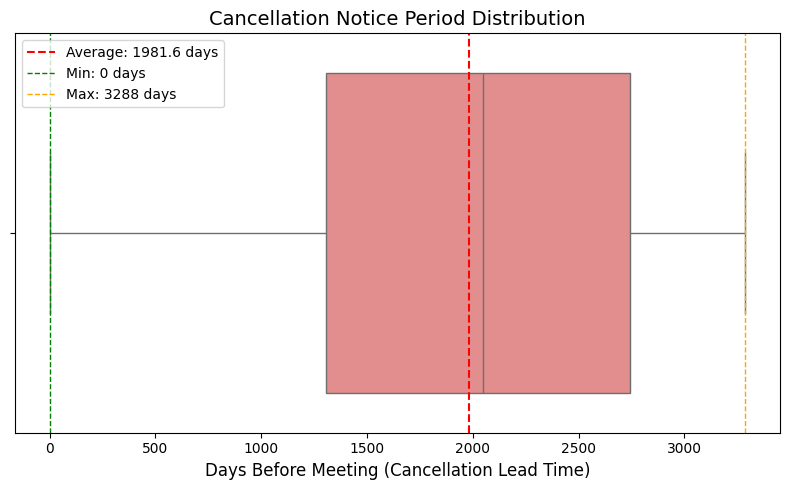

In [ ]:
# Convert Timedelta to days
avg_days = avg_cancel_notice.days + avg_cancel_notice.seconds / 86400
min_days = min_cancel_notice.days + min_cancel_notice.seconds / 86400
max_days = max_cancel_notice.days + max_cancel_notice.seconds / 86400

plt.figure(figsize=(8, 5))

# Boxplot for cancellation notice times
sns.boxplot(
    x=cancelled_df['CancellationLeadTime'].dt.days,
    color='lightcoral'
)

# Add vertical lines for avg, min, max
plt.axvline(avg_days, color='red', linestyle='--', linewidth=1.5, label=f'Average: {avg_days:.1f} days')
plt.axvline(min_days, color='green', linestyle='--', linewidth=1, label=f'Min: {min_days:.0f} days')
plt.axvline(max_days, color='orange', linestyle='--', linewidth=1, label=f'Max: {max_days:.0f} days')

plt.title("Cancellation Notice Period Distribution", fontsize=14)
plt.xlabel("Days Before Meeting (Cancellation Lead Time)", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#ID with at least one weekend booking

# Filter for active bookings
active_bookings = book_df1[book_df1['BookingOccasionState_Title'] == 'Active']

# Extract weekday from start datetime (0=Mon, ..., 6=Sun)
active_bookings['Booking_DayofWeek'] = active_bookings['BookingOccasion_StartDateTime'].dt.dayofweek

# Filter where day is Saturday (5) or Sunday (6)
weekend_active = active_bookings[active_bookings['Booking_DayofWeek'].isin([5, 6])]

# Get unique building IDs with at least one active weekend booking
buildings_with_weekend_bookings = weekend_active['Area_BuildingId'].unique()

print("Buildings with at least one active weekend booking:")
print(list(buildings_with_weekend_bookings))


Buildings with at least one active weekend booking:
[4, 5, 22, 19, 7, 12, 24, 10, 8, 47, 11, 48]


/tmp/ipython-input-2599543434.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_bookings['Booking_DayofWeek'] = active_bookings['BookingOccasion_StartDateTime'].dt.dayofweek


In [ ]:
#Use in feature engineering this is to make unit have their respective id beside for easy tracing
book_df1['BookableUnit_Name'] = (book_df1['BookableUnit_Title'].astype(str) + "-" + book_df1['BookableUnit_Id'].astype(str)).astype('category')


/tmp/ipython-input-1300320385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_df1['BookableUnit_Name'] = (book_df1['BookableUnit_Title'].astype(str) + "-" + book_df1['BookableUnit_Id'].astype(str)).astype('category')


In [ ]:
#Use in feature engineering this is to make unit have their respective id beside for easy tracing
book_df1['Building_Name'] = (book_df1['Building_Title'].astype(str) + "-" + book_df1['Area_BuildingId'].astype(str)).astype('category')

/tmp/ipython-input-2914675151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_df1['Building_Name'] = (book_df1['Building_Title'].astype(str) + "-" + book_df1['Area_BuildingId'].astype(str)).astype('category')


In [ ]:
#Top 10 Unit with Active bookings

# Filter for active bookings
active_bookings = book_df1[book_df1['BookingOccasionState_Title'] == 'Active']

# Filter for non-clinical booking types
#non_clinical_bookings = active_bookings[active_bookings['BookingType_Title'] == 'NonClinical']

# Group by BookableUnit_Id and count bookings
top_10_units = (
    active_bookings
    .groupby('BookableUnit_Name')['BookingOccasion_Id']
    .count()
    .sort_values(ascending=False)
    .head(10)
)

print(top_10_units)


BookableUnit_Name
Hpsayzwlsu Sppt 07-203                7891
Hpsayzwlsu Sppt 08-204                7600
HCYQU Hpsayzwlsu Sppt 1-92            7586
HCYQU Hpsayzwlsu Sppt 2-93            7411
Hpsayzwlsu Sppt 04-200                7386
HCYQU Hpysavzzlsu Sppt-95             7249
HCYQU Hpsayzwlsu Sppt 3-94            7194
Hpsayzwlsu Sppt 02-198                6903
Hpsayzwlsu Sppt 01  (Ciw Sppt)-197    6587
Hpsayzwlsu Sppt 05-201                6399
Name: BookingOccasion_Id, dtype: int64


/tmp/ipython-input-196035804.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('BookableUnit_Name')['BookingOccasion_Id']


In [ ]:
# Filter for active bookings
active_bookings = book_df1[book_df1['BookingOccasionState_Title'] == 'Active']

# Filter for non-clinical booking types
#non_clinical_bookings = active_bookings[active_bookings['BookingType_Title'] == 'NonClinical']

# Group by BookableUnit_Id and count bookings
bottom_10_units = (
    active_bookings
    .groupby('BookableUnit_Name')['BookingOccasion_Id']
    .count()
    .sort_values(ascending=False)
    .tail(10)
)

print(bottom_10_units)


BookableUnit_Name
Sppt 07 (7)-356                                                       0
Sppt 10 (5)-635                                                       0
Sppt 320 Rbwlvsw Ubjvwf Kvac 05-530                                   0
Sppt 402 Kvac 1 (Hpsayzwbsw Rafeglbwilawa bsh Ybsbuvtvsw pszf)-630    0
Ebyib Ylwegvzz Sppt 3 (4)-595                                         0
Fbuglzz Qpyav (4)-594                                                 0
Ciwa bsh Hibjwa-cvf beevaa ivoylivh (8)-645                           0
Cewlrlwf Sppt (6)-602                                                 0
CKE Dlwegvs (6)-599                                                   0
EK Yvvwlsu Sppt (10)-359                                              0
Name: BookingOccasion_Id, dtype: int64


/tmp/ipython-input-4282329693.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('BookableUnit_Name')['BookingOccasion_Id']


In [ ]:
#Use. this code pivot bookings into montly bookings per unit so each month present in the dataset from 2016 to 2025
# 1. Filter for active bookings not cancelled
book_df1 = book_df1[book_df1['BookingOccasionState_Title'] == 'Active']

# 2. Create Year-Month column
book_df1['YearMonth'] = book_df1['BookingOccasion_StartDateTime'].dt.to_period('M')

# 3. Group and count monthly bookings
monthly_counts = book_df1.groupby(['BookableUnit_Id', 'YearMonth'])['BookingOccasion_Id'].count().reset_index()
monthly_counts.rename(columns={'BookingOccasion_Id': 'Monthly_Bookings'}, inplace=True)

# 4. Pivot into monthly time-series
monthly_pivot = monthly_counts.pivot(index='BookableUnit_Id', columns='YearMonth', values='Monthly_Bookings').fillna(0)

# 5. Select unique metadata per BookableUnit_Id
meta_cols = ['BookableUnit_Id', 'BookableUnit_Name', 'Building_Name', 'District_Title', 'Equipment_Title', 'BookableUnit_Capacity','BookableUnitType_Title']
unit_metadata = book_df1[meta_cols].drop_duplicates(subset='BookableUnit_Id').set_index('BookableUnit_Id')

# Mapping of NaN identifiers to replacement names
replace_map = {
    'nan-12': 'Rjxxn Pbxx-12',
    'nan-13': 'Oyaoimxon Xpam-13',
    'nan-4':  'Nbimxozjyq bpq Tjykbpmjp Vaimyawm Pjirambx-4',
    'nan-22': 'Rxokkapf Njlym, Kxbiigjlfgmjp-22',
    'nan-35': 'Pohqop Yyaqfo Pobxmg Nopmyo-35',
    'nan-17': 'Drjxxj Njlym Aoqawbx Nopmyo-17',
    'nan-47': 'Toemjp Qjqfo-47'
}

# Replace values in the Building_Name column
unit_metadata['Building_Name'] = unit_metadata['Building_Name'].replace(replace_map)


unit_metadata['District_Title'] = unit_metadata['District_Title'].astype(str)

replacement_map = {
    '4':  'Y hkgzlkh-3',
    '22': 'Hnfpuyplq-4',
    '12': 'Dnlqpgqnlp & Zygflpph-6',
    '17': 'Nngvhlpt-5',
    '13': 'Dnlqpgqnlp & Zygflpph-6',
    '35': 'Dnlqpgqnlp & Zygflpph-6',
    '47': 'Hnfpuyplq-4'
}

for suffix, new_value in replacement_map.items():
    mask = unit_metadata['Building_Name'].str.endswith(suffix, na=False)
    unit_metadata.loc[mask, 'District_Title'] = new_value

# 6. Combine metadata with pivoted time series
final_df = unit_metadata.join(monthly_pivot, how='inner')



/tmp/ipython-input-1875511280.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = book_df1.groupby(['BookableUnit_Id', 'YearMonth'])['BookingOccasion_Id'].count().reset_index()
/tmp/ipython-input-1875511280.py:30: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  unit_metadata['Building_Name'] = unit_metadata['Building_Name'].replace(replace_map)


In [ ]:
final_df.loc[final_df['District_Title'] == 'Nngvhlpt', 'District_Title'] = 'Nngvhlpt-5'

In [ ]:
final_df.loc[final_df['District_Title'] == 'Dnlqpgqnlp & Zygflpph', 'District_Title'] = 'Dnlqpgqnlp & Zygflpph-6'

In [ ]:
final_df.loc[final_df['District_Title'] == 'Hnfpuyplq', 'District_Title'] = 'Hnfpuyplq-4'

In [ ]:
#final_df = final_df[final_df['District_Title'] != 'Y hkgzlkh-3']


In [ ]:
#monthly_pivot.to_csv('monthly_pivot.csv')

In [ ]:
final_df.head()

,BookableUnit_Name,Building_Name,District_Title,Equipment_Title,BookableUnit_Capacity,BookableUnitType_Title,2016-06,2016-07,2016-08,2016-09,...,2024-08,2024-09,2024-10,2024-11,2024-12,2025-01,2025-02,2025-03,2025-04,2025-05
BookableUnit_Id,,,,,,,,,,,,,,,,,,,,,
17,Sppt 100 (Hbq 4)-17,Nbimxozjyq bpq Tjykbpmjp Vaimyawm Pjirambx-4,Y hkgzlkh-3,Whiteboard,4.0,Meeting Room,14,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,Sppt 100 (Hbq 6)-18,Nbimxozjyq bpq Tjykbpmjp Vaimyawm Pjirambx-4,Y hkgzlkh-3,"Flipboard, Whiteboard, Cisco Conference Phone",6.0,Meeting Room,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,L71 Hpsayzwlsu Sppt 1-47,Toe Mmyoom Pobxmg Nopmyo-8,Nngvhlpt-5,"Examination Couch, PC",3.0,Meeting Room,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
37,Xpiwzvf Yvvwlsu Sppt (6)-37,Iopqybn Pjirambx-7,Nngvhlpt-5,NaN,6.0,Meeting Room,0,0,1,0,...,30,37,35,35,37,41,37,43,36,21
30,Hpsayzwlsu Sppt 01-30,Ybfgaxx Pjlio Pobxmg & Hoxxhoapf Nopmyo-6,Hnfpuyplq-4,"Flipboard, Whiteboard, Cisco Conference Phone,...",2.0,Meeting Room,0,0,1,0,...,39,53,47,43,41,50,47,50,50,35


In [ ]:
final_df['District_Title'].value_counts()

,count
District_Title,
Hnfpuyplq-4,132
Dnlqpgqnlp & Zygflpph-6,123
Nngvhlpt-5,45
Y hkgzlkh-3,15
Pevsnhwpg,15


In [ ]:
#final_df.to_csv('final_df.csv')

In [ ]:
#use
# Count number of months with at least one booking for each BookableUnit_Id
final_df['Active_Months'] = (monthly_pivot > 0).sum(axis=1)

In [ ]:
#use
final_df['Total_Bookings'] = monthly_pivot.sum(axis=1)

In [ ]:
final_df.shape

(330, 116)

In [ ]:
#use
final_df[['Total_Bookings', 'Active_Months']].head(20)

,Total_Bookings,Active_Months
BookableUnit_Id,,
17,14,1
18,1,1
47,3,3
37,2924,96
30,4375,96
19,1,1
117,2627,94
124,4953,91
122,6339,91


In [ ]:
final_HD_df = final_df[final_df['BookableUnitType_Title'] == 'Hot Desk']

In [ ]:
final_HD_df.shape

(60, 116)

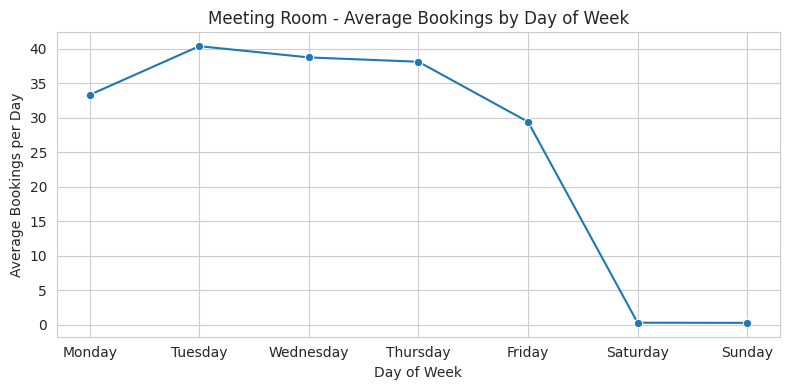

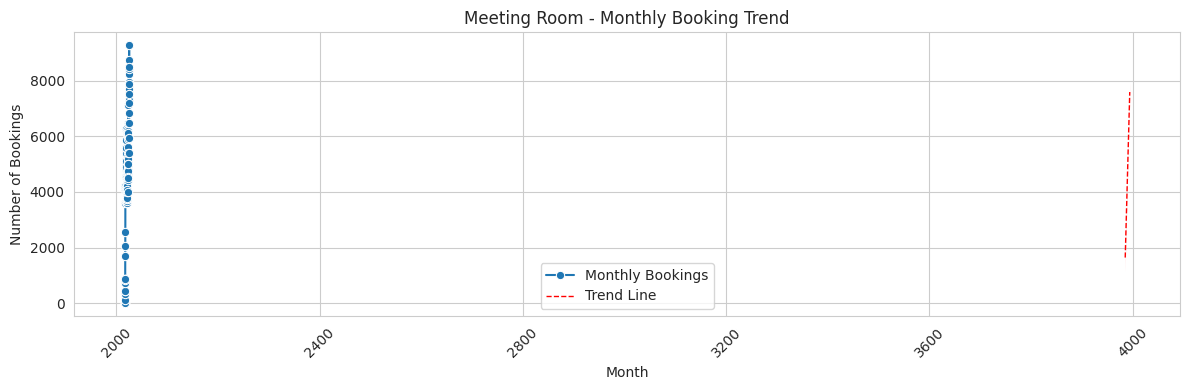

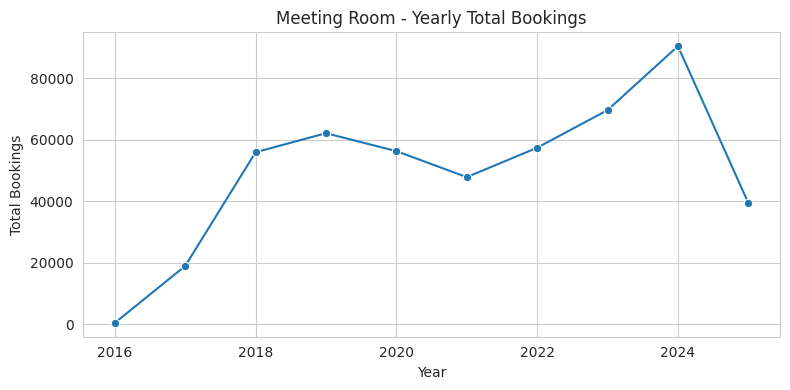

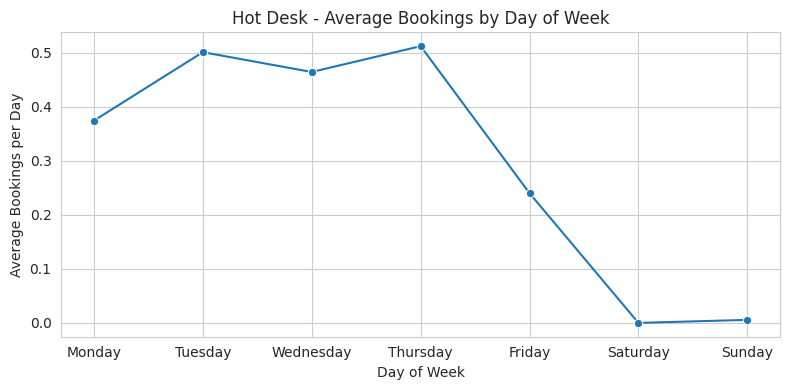

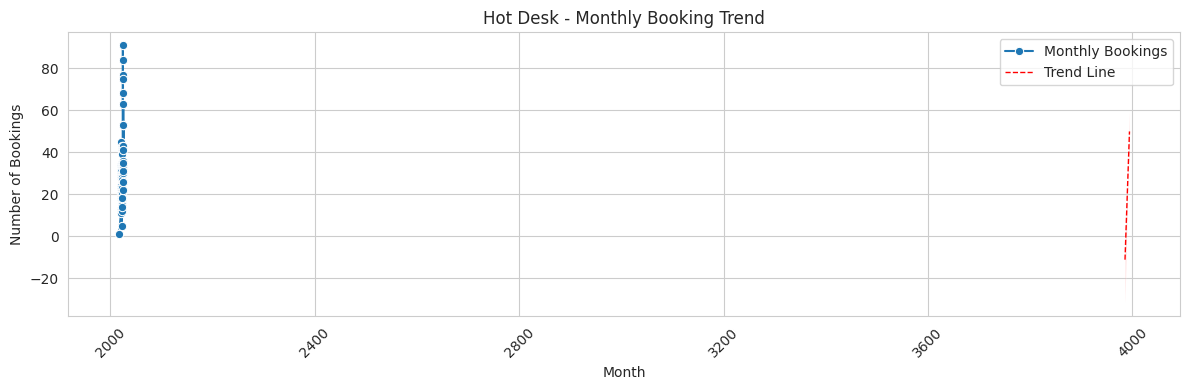

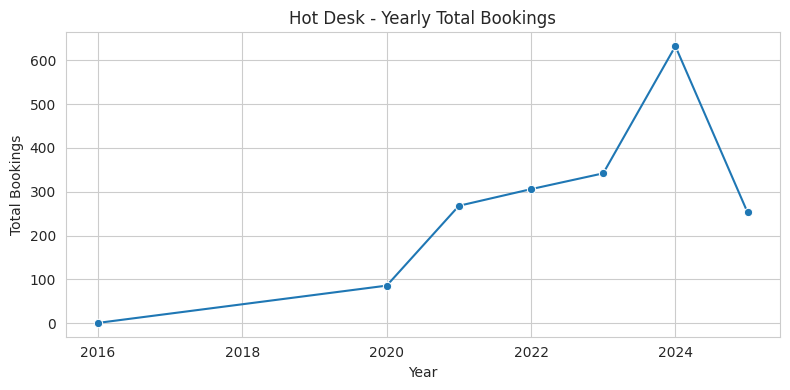

In [ ]:
#Use. This shows the usage trend. Ignore the montly trend for both meeting room and hot desk

sns.set_style("whitegrid")

# Filter only Active bookings
active_df = book_df1[book_df1['BookingOccasionState_Title'] == 'Active']

def plot_booking_stats(df, title_prefix):
    # DAILY AVERAGE (Day of Week)
    df['DayOfWeek'] = df['BookingOccasion_StartDateTime'].dt.day_name()
    daily_avg = df.groupby('DayOfWeek')['BookingOccasion_Id'].count() / df['BookingOccasion_StartDateTime'].dt.date.nunique()
    day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

    plt.figure(figsize=(8, 4))
    sns.lineplot(x=day_order, y=[daily_avg.get(day, 0) for day in day_order], marker="o")
    plt.title(f"{title_prefix} - Average Bookings by Day of Week")
    plt.xlabel("Day of Week")
    plt.ylabel("Average Bookings per Day")
    plt.tight_layout()
    plt.show()

    # MONTHLY TREND
    monthly_counts = df.groupby(df['BookingOccasion_StartDateTime'].dt.to_period('M'))['BookingOccasion_Id'].count()
    monthly_counts.index = monthly_counts.index.to_timestamp()

    plt.figure(figsize=(12, 4))
    sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker="o", label="Monthly Bookings")
    # Trend line (ordinal dates for regression)
    ordinals = monthly_counts.index.map(pd.Timestamp.toordinal)
    sns.regplot(
        x=ordinals,
        y=monthly_counts.values,
        scatter=False,
        color="red",
        line_kws={"linewidth":1, "linestyle":"--"},
        label="Trend Line"
    )
    plt.title(f"{title_prefix} - Monthly Booking Trend")
    plt.xlabel("Month")
    plt.ylabel("Number of Bookings")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # YEARLY TREND
    yearly_counts = df.groupby(df['BookingOccasion_StartDateTime'].dt.year)['BookingOccasion_Id'].count()
    plt.figure(figsize=(8, 4))
    sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker="o")
    plt.title(f"{title_prefix} - Yearly Total Bookings")
    plt.xlabel("Year")
    plt.ylabel("Total Bookings")
    plt.tight_layout()
    plt.show()

# Separate Meeting Room and Hot Desk
mr_df = active_df[active_df['BookableUnitType_Title'] == 'Meeting Room'].copy()
hd_df = active_df[active_df['BookableUnitType_Title'] == 'Hot Desk'].copy()

# Run for Meeting Room
plot_booking_stats(mr_df, "Meeting Room")

# Run for Hot Desk
plot_booking_stats(hd_df, "Hot Desk")


In [ ]:
#final_HD_df.to_csv('final_HD_df.csv')

KMEANS CLUSTERING TO CLUSTER BOOKABLE UNITS(Meeting Room) BASED ON TREND

In [ ]:
#Use. selecting only meeting room for clusting(reason is meeting room and hot desk have diffrent space features)
final_MR_df = final_df[final_df['BookableUnitType_Title'] == 'Meeting Room']

In [ ]:
#use. this cloumn are the data on features about the room.
metadata_cols = ['BookableUnit_Name', 'Building_Name', 'District_Title','Equipment_Title', 'BookableUnit_Capacity','BookableUnitType_Title', 'Active_Months', 'Total_Bookings']
MR_metadata =final_MR_df[metadata_cols]

In [ ]:
pd.reset_option('display.max_rows')

In [ ]:
#use this dataframe includes only monthly booking rate per unit
MR = final_MR_df.drop(columns= metadata_cols)

In [ ]:
#use for standardizing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
MR_scaled = scaler.fit_transform(MR)


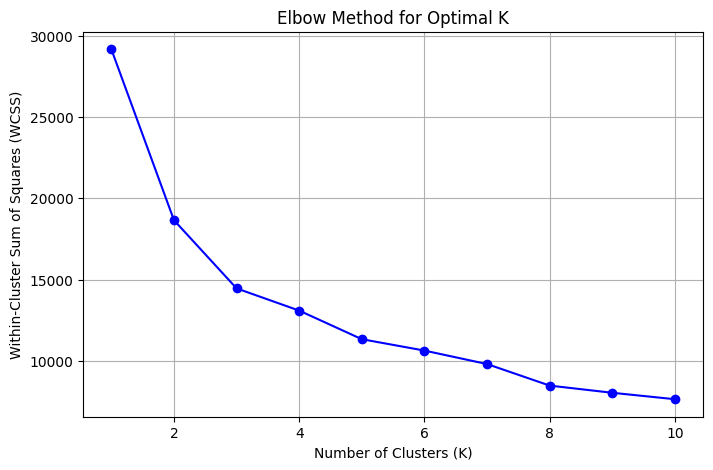

In [ ]:
#Use This elbow method selects the optimum K (3)

from sklearn.cluster import KMeans


wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(MR_scaled)
    wcss.append(kmeans.inertia_)

# Plot WCSS to find the elbow
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

In [ ]:
#Use
# 6. Fit final KMeans with optimal K using the standardized montly booking rates
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(MR_scaled)

In [ ]:
#use
# 7. Create final DataFrame with cluster labels
MR_clustered_df = MR_metadata.copy()
MR_clustered_df['Cluster'] = cluster_labels

In [ ]:
MR_clustered_df.head()

,BookableUnit_Name,Building_Name,District_Title,Equipment_Title,BookableUnit_Capacity,BookableUnitType_Title,Active_Months,Total_Bookings,Cluster
BookableUnit_Id,,,,,,,,,
17,Sppt 100 (Hbq 4)-17,Nbimxozjyq bpq Tjykbpmjp Vaimyawm Pjirambx-4,Y hkgzlkh-3,Whiteboard,4.0,Meeting Room,1,14,1
18,Sppt 100 (Hbq 6)-18,Nbimxozjyq bpq Tjykbpmjp Vaimyawm Pjirambx-4,Y hkgzlkh-3,"Flipboard, Whiteboard, Cisco Conference Phone",6.0,Meeting Room,1,1,1
47,L71 Hpsayzwlsu Sppt 1-47,Toe Mmyoom Pobxmg Nopmyo-8,Nngvhlpt-5,"Examination Couch, PC",3.0,Meeting Room,3,3,1
37,Xpiwzvf Yvvwlsu Sppt (6)-37,Iopqybn Pjirambx-7,Nngvhlpt-5,NaN,6.0,Meeting Room,96,2924,0
30,Hpsayzwlsu Sppt 01-30,Ybfgaxx Pjlio Pobxmg & Hoxxhoapf Nopmyo-6,Hnfpuyplq-4,"Flipboard, Whiteboard, Cisco Conference Phone,...",2.0,Meeting Room,96,4375,0


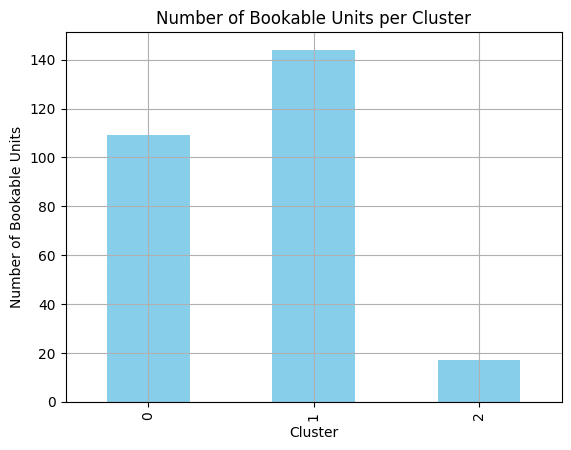

In [ ]:
#use
# 9. Visualize cluster size
MR_clustered_df['Cluster'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Bookable Units')
plt.title('Number of Bookable Units per Cluster')
plt.grid(True)
plt.show()

In [ ]:
cluster0 = MR_clustered_df[MR_clustered_df['Cluster'] == 0]
cluster1 = MR_clustered_df[MR_clustered_df['Cluster'] == 1]
cluster2 = MR_clustered_df[MR_clustered_df['Cluster'] == 2]

In [ ]:
cluster0.head()

,BookableUnit_Name,Building_Name,District_Title,Equipment_Title,BookableUnit_Capacity,BookableUnitType_Title,Active_Months,Total_Bookings,Cluster
BookableUnit_Id,,,,,,,,,
37,Xpiwzvf Yvvwlsu Sppt (6)-37,Iopqybn Pjirambx-7,Nngvhlpt-5,NaN,6.0,Meeting Room,96,2924,0
30,Hpsayzwlsu Sppt 01-30,Ybfgaxx Pjlio Pobxmg & Hoxxhoapf Nopmyo-6,Hnfpuyplq-4,"Flipboard, Whiteboard, Cisco Conference Phone,...",2.0,Meeting Room,96,4375,0
117,Utbzz Hpsjvivsev Sppt (25)-117,Raoxqgobq Pjirambx-19,Hnfpuyplq-4,"Flipboard, Lap Top, Projector, Whiteboard, Lap...",25.0,Meeting Room,94,2627,0
127,Sppt 7 ((ebqbelwf 5) OPG 6587-127,Zbuopixoafg-9,Dnlqpgqnlp & Zygflpph-6,"PC, Telephone, Desk",5.0,Meeting Room,79,3514,0
36,Flzzlsuzvf Yvvwlsu Sppt (6)-36,Iopqybn Pjirambx-7,Nngvhlpt-5,NaN,6.0,Meeting Room,66,2054,0


In [ ]:
min_maxC0 = cluster0['Total_Bookings'].agg(['min', 'max'])
print(min_maxC0)

min    1563
max    5388
Name: Total_Bookings, dtype: int64


In [ ]:
min_maxCc0 = cluster0['Active_Months'].agg(['min', 'max'])
print(min_maxCc0)

min     38
max    103
Name: Active_Months, dtype: int64


In [ ]:
min_maxC1 = cluster1['Total_Bookings'].agg(['min', 'max'])
print(min_maxC1)

min       1
max    1838
Name: Total_Bookings, dtype: int64


In [ ]:
min_maxCc1 = cluster1['Active_Months'].agg(['min', 'max'])
print(min_maxCc1)

min      1
max    103
Name: Active_Months, dtype: int64


In [ ]:
min_maxC2 = cluster2['Total_Bookings'].agg(['min', 'max'])
print(min_maxC2)

min    4953
max    7891
Name: Total_Bookings, dtype: int64


In [ ]:
min_maxCc2 = cluster2['Active_Months'].agg(['min', 'max'])
print(min_maxCc2)

min     84
max    103
Name: Active_Months, dtype: int64


In [ ]:
cluster0.head()

,BookableUnit_Name,Building_Name,District_Title,Equipment_Title,BookableUnit_Capacity,BookableUnitType_Title,Active_Months,Total_Bookings,Cluster
BookableUnit_Id,,,,,,,,,
37,Xpiwzvf Yvvwlsu Sppt (6)-37,Iopqybn Pjirambx-7,Nngvhlpt-5,NaN,6.0,Meeting Room,96,2924,0
30,Hpsayzwlsu Sppt 01-30,Ybfgaxx Pjlio Pobxmg & Hoxxhoapf Nopmyo-6,Hnfpuyplq-4,"Flipboard, Whiteboard, Cisco Conference Phone,...",2.0,Meeting Room,96,4375,0
117,Utbzz Hpsjvivsev Sppt (25)-117,Raoxqgobq Pjirambx-19,Hnfpuyplq-4,"Flipboard, Lap Top, Projector, Whiteboard, Lap...",25.0,Meeting Room,94,2627,0
127,Sppt 7 ((ebqbelwf 5) OPG 6587-127,Zbuopixoafg-9,Dnlqpgqnlp & Zygflpph-6,"PC, Telephone, Desk",5.0,Meeting Room,79,3514,0
36,Flzzlsuzvf Yvvwlsu Sppt (6)-36,Iopqybn Pjirambx-7,Nngvhlpt-5,NaN,6.0,Meeting Room,66,2054,0


In [ ]:
# Add cluster labels to monthly rates DataFrame
MR_clustered_rates = MR.copy()
MR_clustered_rates['Cluster'] = cluster_labels

In [ ]:
MR_clustered_rates.head()

,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,...,2024-09,2024-10,2024-11,2024-12,2025-01,2025-02,2025-03,2025-04,2025-05,Cluster
BookableUnit_Id,,,,,,,,,,,,,,,,,,,,,
17,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
47,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
37,0,0,1,0,0,0,0,0,0,1,...,37,35,35,37,41,37,43,36,21,0
30,0,0,1,0,0,0,1,0,0,0,...,53,47,43,41,50,47,50,50,35,0


In [ ]:
cluStage1_df = final_MR_df.copy()
cluStage1_df['Cluster'] = cluster_labels

In [ ]:
#cluStage1_df = cluStage1_df.loc[cluStage1_df['District_Title']!= 'Y hkgzlkh-3']

In [ ]:
cluStage1_df.head()

,BookableUnit_Name,Building_Name,District_Title,Equipment_Title,BookableUnit_Capacity,BookableUnitType_Title,2016-06,2016-07,2016-08,2016-09,...,2024-11,2024-12,2025-01,2025-02,2025-03,2025-04,2025-05,Active_Months,Total_Bookings,Cluster
BookableUnit_Id,,,,,,,,,,,,,,,,,,,,,
17,Sppt 100 (Hbq 4)-17,Nbimxozjyq bpq Tjykbpmjp Vaimyawm Pjirambx-4,Y hkgzlkh-3,Whiteboard,4.0,Meeting Room,14,0,0,0,...,0,0,0,0,0,0,0,1,14,1
18,Sppt 100 (Hbq 6)-18,Nbimxozjyq bpq Tjykbpmjp Vaimyawm Pjirambx-4,Y hkgzlkh-3,"Flipboard, Whiteboard, Cisco Conference Phone",6.0,Meeting Room,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1
47,L71 Hpsayzwlsu Sppt 1-47,Toe Mmyoom Pobxmg Nopmyo-8,Nngvhlpt-5,"Examination Couch, PC",3.0,Meeting Room,0,1,0,1,...,0,0,0,0,0,0,0,3,3,1
37,Xpiwzvf Yvvwlsu Sppt (6)-37,Iopqybn Pjirambx-7,Nngvhlpt-5,NaN,6.0,Meeting Room,0,0,1,0,...,35,37,41,37,43,36,21,96,2924,0
30,Hpsayzwlsu Sppt 01-30,Ybfgaxx Pjlio Pobxmg & Hoxxhoapf Nopmyo-6,Hnfpuyplq-4,"Flipboard, Whiteboard, Cisco Conference Phone,...",2.0,Meeting Room,0,0,1,0,...,43,41,50,47,50,50,35,96,4375,0


In [ ]:
#cluStage1_df.to_csv('cluStage1_df.csv')

FEATURES RELATIONSHIP TEST(Include in steps before K-means Clustering after daily and yearly trend graphs for meeting room and desk)

In [ ]:
# Compute Pearson correlation for unit capacity and Total bookings
correlation = cluStage1_df[['BookableUnit_Capacity', 'Total_Bookings']].corr(method='pearson')

# Display the correlation matrix
print("Pearson Correlation Matrix:")
print(correlation)


Pearson Correlation Matrix:
                       BookableUnit_Capacity  Total_Bookings
BookableUnit_Capacity               1.000000        0.050115
Total_Bookings                      0.050115        1.000000


In [ ]:
# Spearman correlation (good for ranked or monotonic relationships)
Scorr = cluStage1_df[['BookableUnit_Capacity', 'Total_Bookings']].corr(method='spearman')

# Display the correlation matrix
print("Spearman Correlation Matrix:")
print(Scorr)

Spearman Correlation Matrix:
                       BookableUnit_Capacity  Total_Bookings
BookableUnit_Capacity               1.000000       -0.006396
Total_Bookings                     -0.006396        1.000000


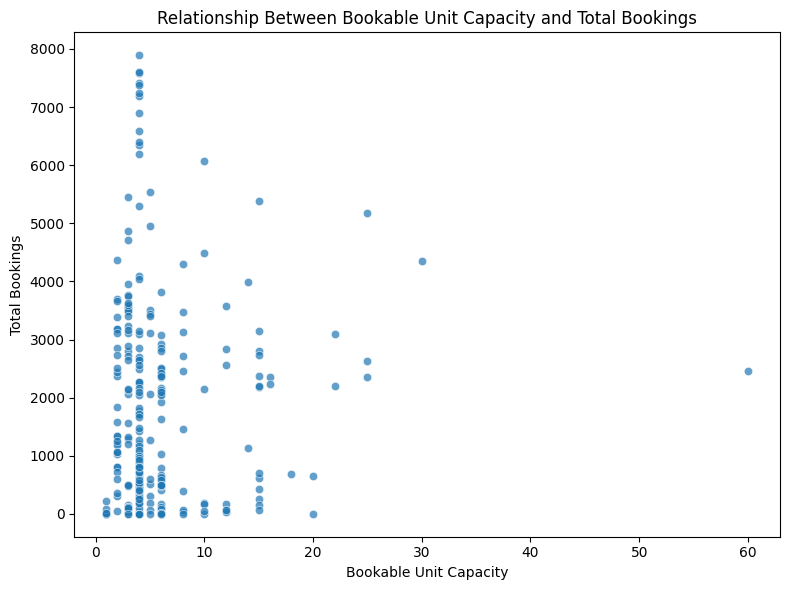

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=cluStage1_df,
    x='BookableUnit_Capacity',
    y='Total_Bookings',
    alpha=0.7
)
plt.title('Relationship Between Bookable Unit Capacity and Total Bookings')
plt.xlabel('Bookable Unit Capacity')
plt.ylabel('Total Bookings')
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import shapiro

stat, p_value = shapiro(cluStage1_df['Total_Bookings'])

print('Shapiro-Wilk Test Statistic:', stat)
print('p-value:', p_value)

# Interpretation
if p_value > 0.05:
    print("Sample looks Gaussian (normal distribution) — fail to reject H0")
else:
    print("Sample does not look Gaussian (not normal) — reject H0")

Shapiro-Wilk Test Statistic: 0.8688522012954709
p-value: 2.024321999995496e-14
Sample does not look Gaussian (not normal) — reject H0


In [ ]:
#Relationship bewteen Equipment_Title and Total_Bookings using Kruskal-Walis because of lack of noramlity in the data distribution
from scipy.stats import kruskal, chi2_contingency

# 1. Replace NaN in Equipment_Title and make categorical
cluStage1_df['Equipment_Title'] = cluStage1_df['Equipment_Title'].fillna('Unknown').astype('category')

# 2. Prepare data for Kruskal-Wallis
groups = [group['Total_Bookings'].values for _, group in cluStage1_df.groupby('Equipment_Title')]

# 3. Kruskal-Wallis test
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis H-test: H={stat:.4f}, p={p:.4e}")

if p < 0.05:
    print("Significant difference found")

    # ---- Auto binning using Freedman–Diaconis rule ----
    data = cluStage1_df['Total_Bookings'].dropna()
    q75, q25 = np.percentile(data, [75 ,25])
    iqr = q75 - q25
    bin_width = 2 * iqr * (len(data) ** (-1/3))
    bin_count = int(np.ceil((data.max() - data.min()) / bin_width))
    bin_count = max(bin_count, 2)  # Ensure at least 2 bins

    cluStage1_df['Bookings_Bin'] = pd.cut(cluStage1_df['Total_Bookings'], bins=bin_count, labels=False)

    # Create contingency table
    contingency_table = pd.crosstab(cluStage1_df['Equipment_Title'], cluStage1_df['Bookings_Bin'])

    # Calculate Chi-square
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    cramer_v = np.sqrt(phi2 / (min(k - 1, r - 1)))

    print(f"Cramér's V: {cramer_v:.4f}")

else:
    print("No significant difference found between groups.")


Kruskal-Wallis H-test: H=161.4906, p=6.7544e-13
Significant difference found
Cramér's V: 0.6217


/tmp/ipython-input-2125876789.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['Total_Bookings'].values for _, group in cluStage1_df.groupby('Equipment_Title')]


In [ ]:
cluStage1_df.head()

,BookableUnit_Name,Building_Name,District_Title,Equipment_Title,BookableUnit_Capacity,BookableUnitType_Title,2016-06,2016-07,2016-08,2016-09,...,2024-11,2024-12,2025-01,2025-02,2025-03,2025-04,2025-05,Active_Months,Total_Bookings,Cluster
BookableUnit_Id,,,,,,,,,,,,,,,,,,,,,
17,Sppt 100 (Hbq 4)-17,Nbimxozjyq bpq Tjykbpmjp Vaimyawm Pjirambx-4,Y hkgzlkh-3,Whiteboard,4.0,Meeting Room,14,0,0,0,...,0,0,0,0,0,0,0,1,14,1
18,Sppt 100 (Hbq 6)-18,Nbimxozjyq bpq Tjykbpmjp Vaimyawm Pjirambx-4,Y hkgzlkh-3,"Flipboard, Whiteboard, Cisco Conference Phone",6.0,Meeting Room,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1
47,L71 Hpsayzwlsu Sppt 1-47,Toe Mmyoom Pobxmg Nopmyo-8,Nngvhlpt-5,"Examination Couch, PC",3.0,Meeting Room,0,1,0,1,...,0,0,0,0,0,0,0,3,3,1
37,Xpiwzvf Yvvwlsu Sppt (6)-37,Iopqybn Pjirambx-7,Nngvhlpt-5,Unknown,6.0,Meeting Room,0,0,1,0,...,35,37,41,37,43,36,21,96,2924,0
30,Hpsayzwlsu Sppt 01-30,Ybfgaxx Pjlio Pobxmg & Hoxxhoapf Nopmyo-6,Hnfpuyplq-4,"Flipboard, Whiteboard, Cisco Conference Phone,...",2.0,Meeting Room,0,0,1,0,...,43,41,50,47,50,50,35,96,4375,0


In [ ]:
cluStage1_df.head()

,BookableUnit_Name,Building_Name,District_Title,Equipment_Title,BookableUnit_Capacity,BookableUnitType_Title,2016-06,2016-07,2016-08,2016-09,...,2024-11,2024-12,2025-01,2025-02,2025-03,2025-04,2025-05,Active_Months,Total_Bookings,Cluster
BookableUnit_Id,,,,,,,,,,,,,,,,,,,,,
17,Sppt 100 (Hbq 4)-17,Nbimxozjyq bpq Tjykbpmjp Vaimyawm Pjirambx-4,Y hkgzlkh-3,Whiteboard,4.0,Meeting Room,14,0,0,0,...,0,0,0,0,0,0,0,1,14,1
18,Sppt 100 (Hbq 6)-18,Nbimxozjyq bpq Tjykbpmjp Vaimyawm Pjirambx-4,Y hkgzlkh-3,"Flipboard, Whiteboard, Cisco Conference Phone",6.0,Meeting Room,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1
47,L71 Hpsayzwlsu Sppt 1-47,Toe Mmyoom Pobxmg Nopmyo-8,Nngvhlpt-5,"Examination Couch, PC",3.0,Meeting Room,0,1,0,1,...,0,0,0,0,0,0,0,3,3,1
37,Xpiwzvf Yvvwlsu Sppt (6)-37,Iopqybn Pjirambx-7,Nngvhlpt-5,Unknown,6.0,Meeting Room,0,0,1,0,...,35,37,41,37,43,36,21,96,2924,0
30,Hpsayzwlsu Sppt 01-30,Ybfgaxx Pjlio Pobxmg & Hoxxhoapf Nopmyo-6,Hnfpuyplq-4,"Flipboard, Whiteboard, Cisco Conference Phone,...",2.0,Meeting Room,0,0,1,0,...,43,41,50,47,50,50,35,96,4375,0


In [ ]:
#cluStage1_df.to_csv('cluStage1_df.csv')

/tmp/ipython-input-681773840.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


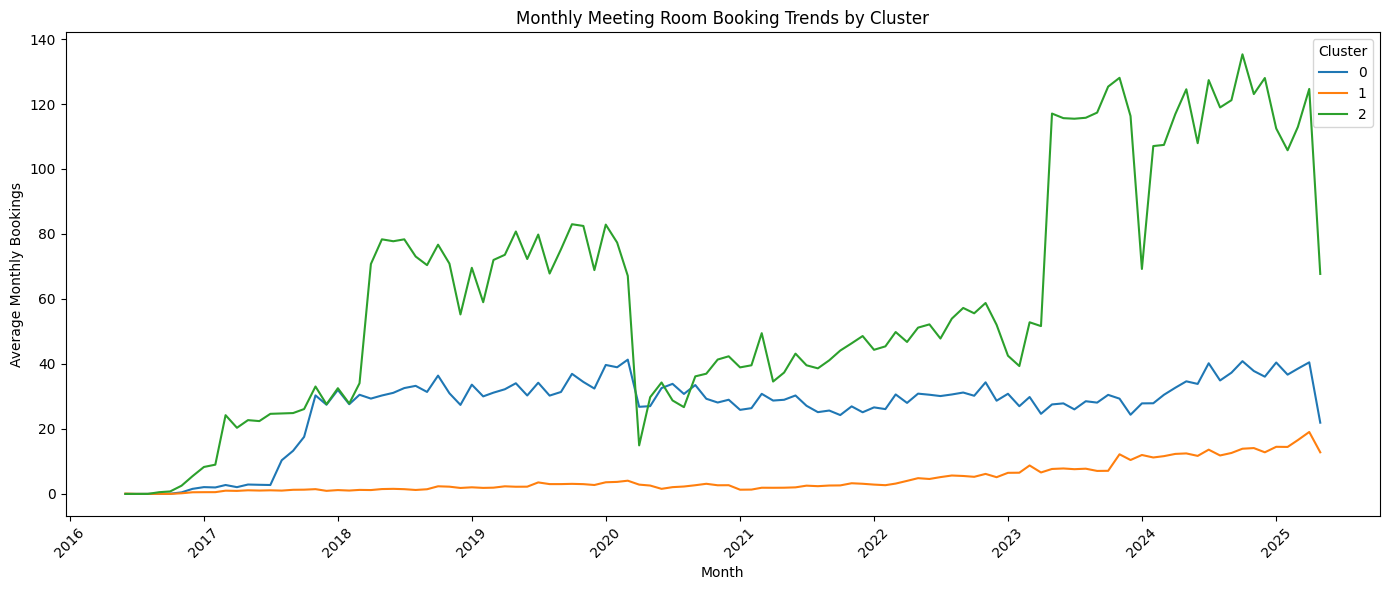

In [ ]:
#K-means Clusters Continuation trend chat

# pivot data longer for easier plotting
melted = MR_clustered_rates.reset_index().melt(
    id_vars=['BookableUnit_Id', 'Cluster'],
    value_vars=MR.columns,
    var_name='Month',
    value_name='Monthly_Bookings'
)

# Convert Month from Period to datetime
melted['Month'] = melted['Month'].astype(str)
melted['Month'] = pd.to_datetime(melted['Month'])

# Plot: average monthly bookings per cluster
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=melted,
    x='Month',
    y='Monthly_Bookings',
    hue='Cluster',
    estimator='mean',
    ci=None,
    palette='tab10'
)
plt.title('Monthly Meeting Room Booking Trends by Cluster')
plt.xlabel('Month')
plt.ylabel('Average Monthly Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1728915011.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


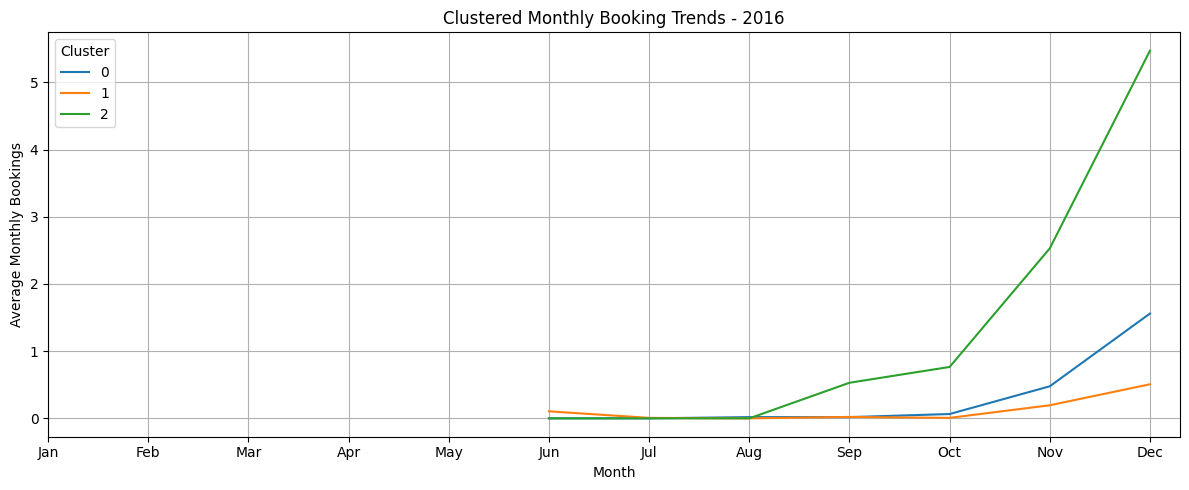

/tmp/ipython-input-1728915011.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


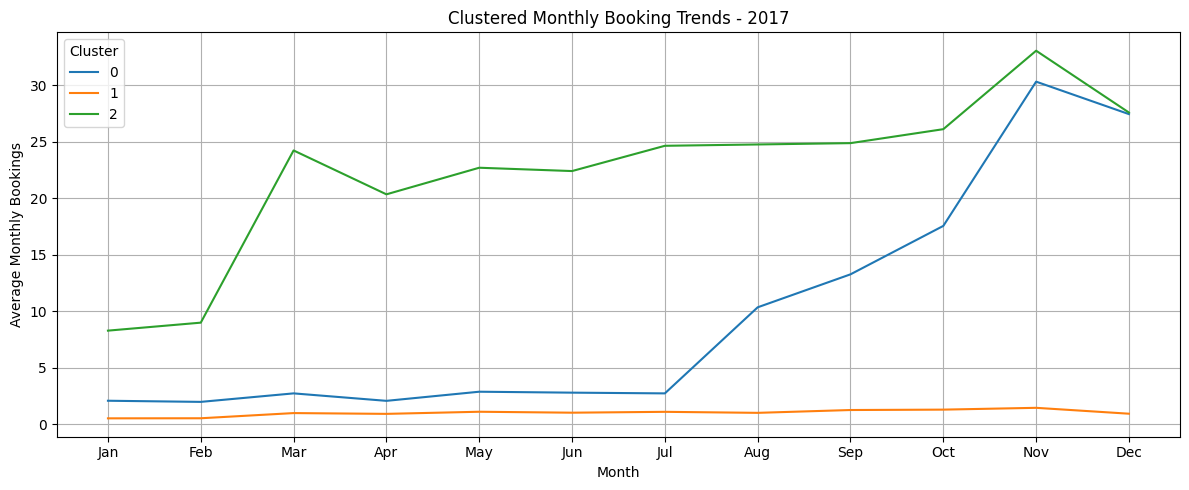

/tmp/ipython-input-1728915011.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


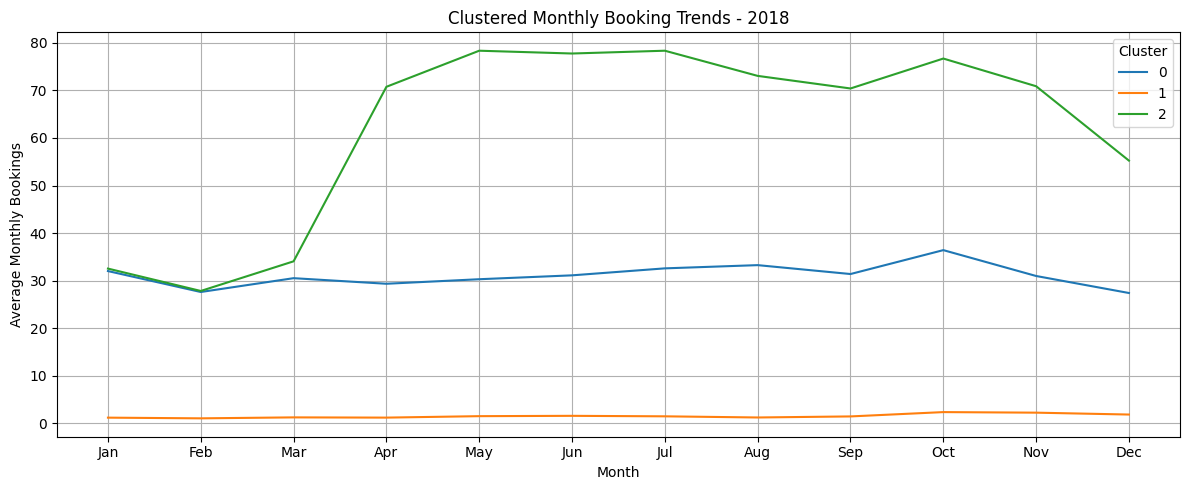

/tmp/ipython-input-1728915011.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


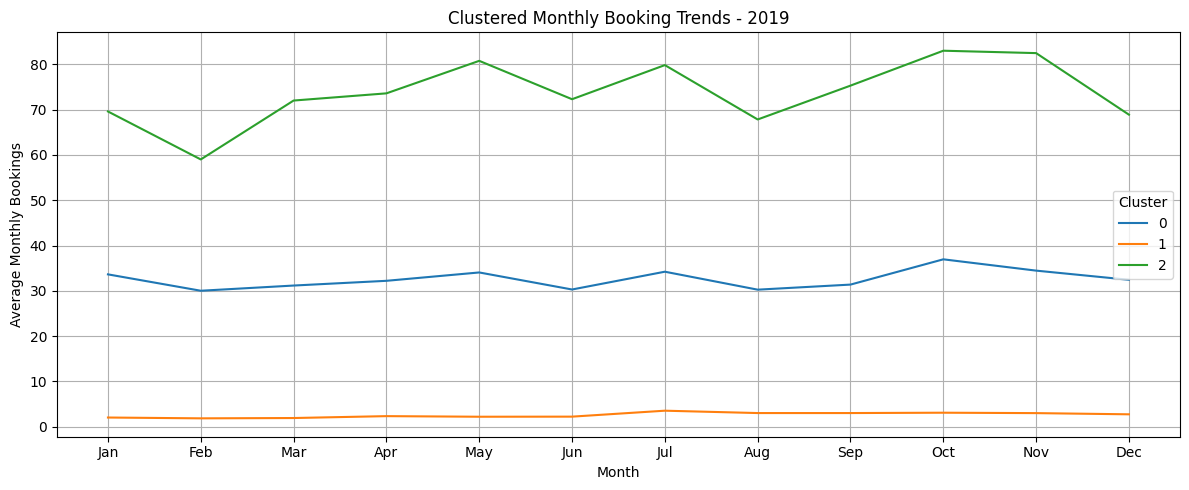

/tmp/ipython-input-1728915011.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


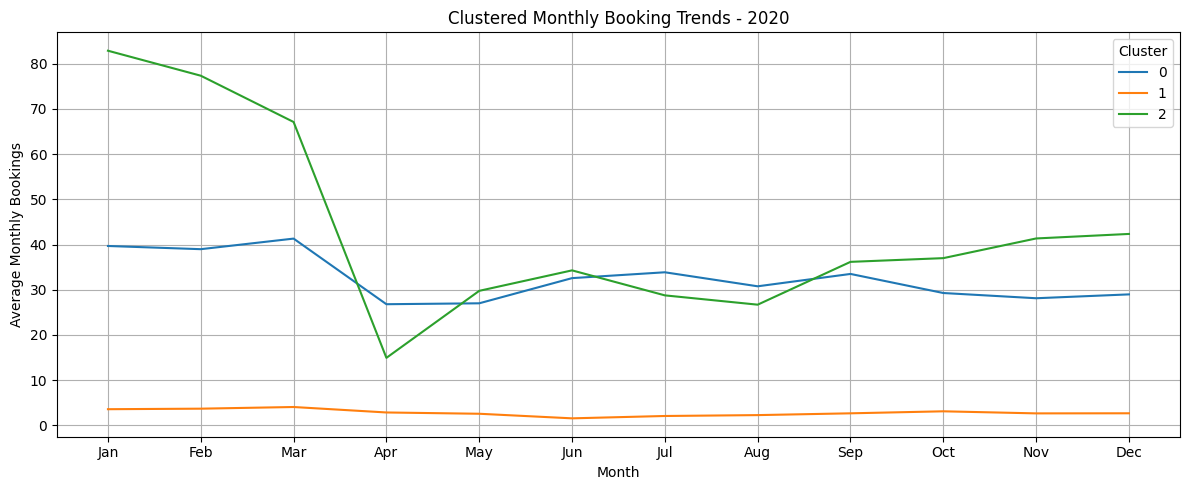

/tmp/ipython-input-1728915011.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


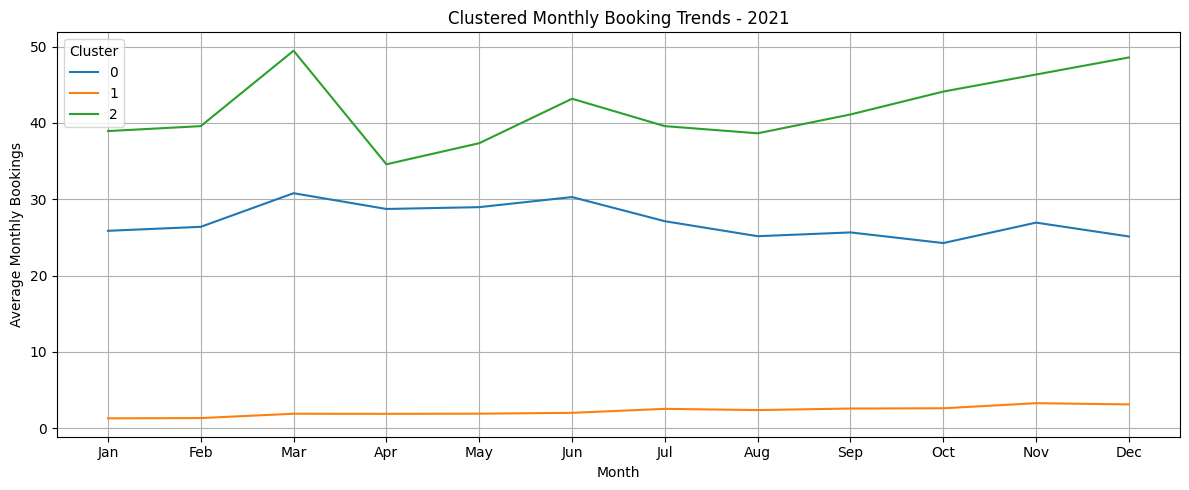

/tmp/ipython-input-1728915011.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


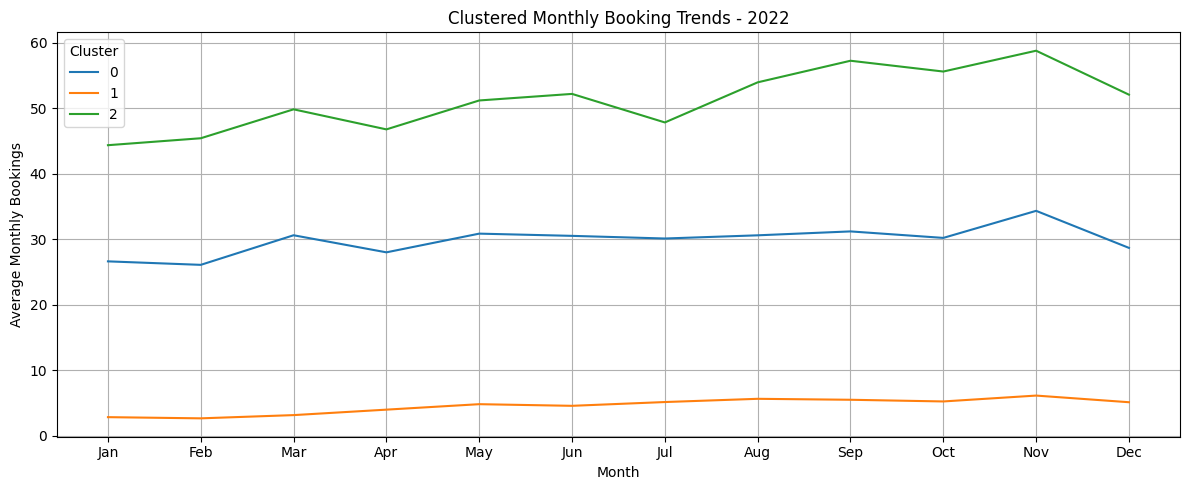

/tmp/ipython-input-1728915011.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


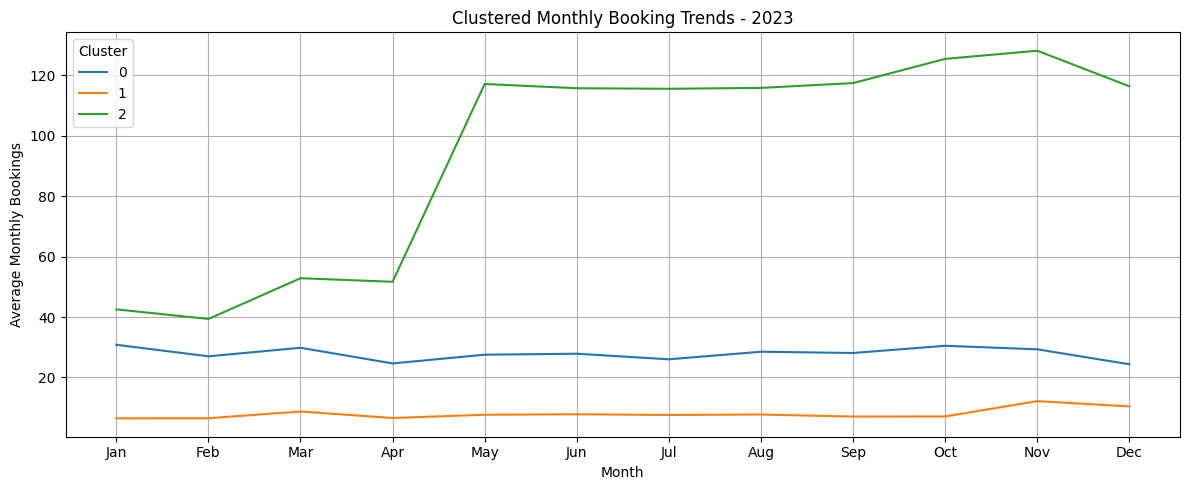

/tmp/ipython-input-1728915011.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


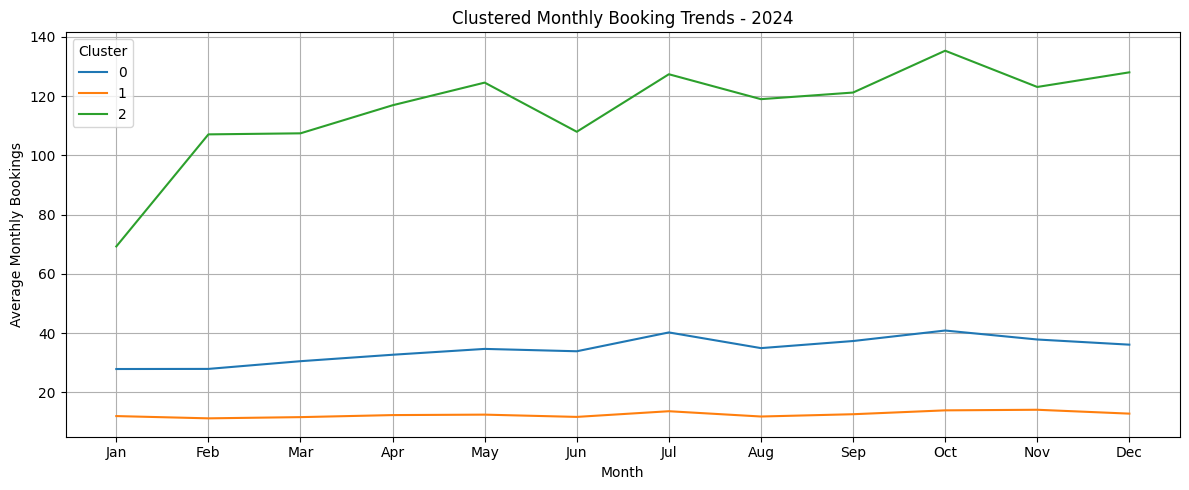

/tmp/ipython-input-1728915011.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


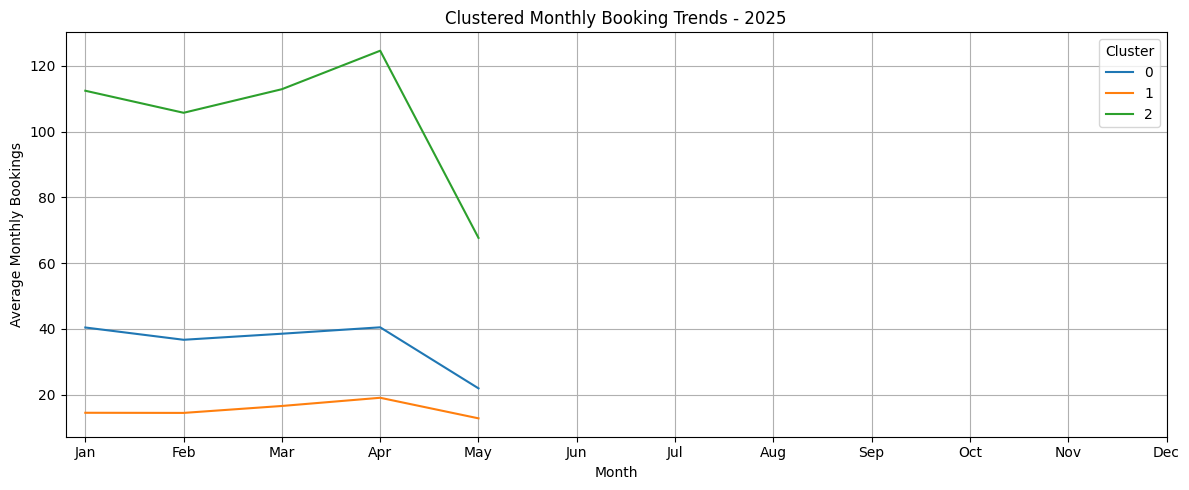

In [ ]:

# Convert Period to datetime
melted['Year'] = melted['Month'].dt.year
melted['Month_Num'] = melted['Month'].dt.month

# 2. Define plot function for each year
def plot_by_year(year):
    plt.figure(figsize=(12, 5))
    yearly_data = melted[melted['Year'] == year]

    sns.lineplot(
        data=yearly_data,
        x='Month_Num',
        y='Monthly_Bookings',
        hue='Cluster',
        estimator='mean',
        ci=None,
        palette='tab10'
    )
    plt.title(f'Clustered Monthly Booking Trends - {year}')
    plt.xlabel('Month')
    plt.ylabel('Average Monthly Bookings')
    plt.xticks(range(1, 13), [
        'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
    ])
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 3. Loop through each year in the dataset
years = melted['Year'].unique()
for yr in sorted(years):
    plot_by_year(yr)


In [ ]:
cluster_1= MR_clustered_rates[MR_clustered_rates['Cluster'] == 1]

In [ ]:
cluster_1.head()

,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,...,2024-09,2024-10,2024-11,2024-12,2025-01,2025-02,2025-03,2025-04,2025-05,Cluster
BookableUnit_Id,,,,,,,,,,,,,,,,,,,,,
17,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
47,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
41,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
103,0,0,0,0,0,15,25,31,21,35,...,23,21,24,17,29,27,28,28,16,1


In [ ]:
from sklearn.preprocessing import StandardScaler
MR_sub = scaler.fit_transform(cluster_1[MR.columns])

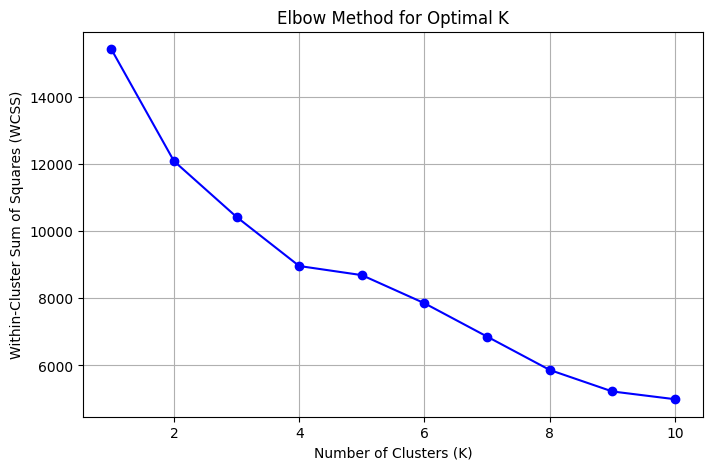

In [ ]:
wcss_sub = []
K_range_sub = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(MR_sub)
    wcss_sub.append(kmeans.inertia_)

# Plot WCSS to find the elbow
plt.figure(figsize=(8, 5))
plt.plot(K_range_sub, wcss_sub, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

In [ ]:
kmeans_sub = KMeans(n_clusters=4, random_state=42)
cluster_1['SubCluster'] = kmeans_sub.fit_predict(MR_sub)


/tmp/ipython-input-1878746198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1['SubCluster'] = kmeans_sub.fit_predict(MR_sub)


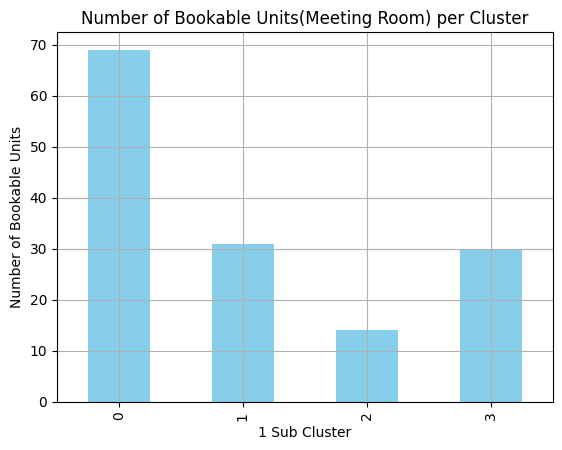

In [ ]:
# 9. Visualize cluster size
cluster_1['SubCluster'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('1 Sub Cluster')
plt.ylabel('Number of Bookable Units')
plt.title('Number of Bookable Units(Meeting Room) per Cluster')
plt.grid(True)
plt.show()

In [ ]:
cluster1.head()

,BookableUnit_Name,Building_Name,District_Title,Equipment_Title,BookableUnit_Capacity,BookableUnitType_Title,Active_Months,Total_Bookings,Cluster
BookableUnit_Id,,,,,,,,,
17,Sppt 100 (Hbq 4)-17,Nbimxozjyq bpq Tjykbpmjp Vaimyawm Pjirambx-4,Y hkgzlkh-3,Whiteboard,4.0,Meeting Room,1,14,1
18,Sppt 100 (Hbq 6)-18,Nbimxozjyq bpq Tjykbpmjp Vaimyawm Pjirambx-4,Y hkgzlkh-3,"Flipboard, Whiteboard, Cisco Conference Phone",6.0,Meeting Room,1,1,1
47,L71 Hpsayzwlsu Sppt 1-47,Toe Mmyoom Pobxmg Nopmyo-8,Nngvhlpt-5,"Examination Couch, PC",3.0,Meeting Room,3,3,1
41,L09 Hpsayzwlsu Sppt-41,Toe Mmyoom Pobxmg Nopmyo-8,Nngvhlpt-5,"PC, Treatment Chair, Examination Couch, Telephone",3.0,Meeting Room,15,81,1
103,Yvvwlsu Sppt 1-103,Vylyn Qbpo Pobxmg & Hoxxhoapf Nopmyo-5,Hnfpuyplq-4,NaN,2.0,Meeting Room,102,1578,1


In [ ]:
MR_clustered1_df = cluster1.copy()
MR_clustered1_df['SubCluster'] = cluster_1['SubCluster']

In [ ]:
MR_clustered1_df.head()

,BookableUnit_Name,Building_Name,District_Title,Equipment_Title,BookableUnit_Capacity,BookableUnitType_Title,Active_Months,Total_Bookings,Cluster,SubCluster
BookableUnit_Id,,,,,,,,,,
17,Sppt 100 (Hbq 4)-17,Nbimxozjyq bpq Tjykbpmjp Vaimyawm Pjirambx-4,Y hkgzlkh-3,Whiteboard,4.0,Meeting Room,1,14,1,0
18,Sppt 100 (Hbq 6)-18,Nbimxozjyq bpq Tjykbpmjp Vaimyawm Pjirambx-4,Y hkgzlkh-3,"Flipboard, Whiteboard, Cisco Conference Phone",6.0,Meeting Room,1,1,1,0
47,L71 Hpsayzwlsu Sppt 1-47,Toe Mmyoom Pobxmg Nopmyo-8,Nngvhlpt-5,"Examination Couch, PC",3.0,Meeting Room,3,3,1,0
41,L09 Hpsayzwlsu Sppt-41,Toe Mmyoom Pobxmg Nopmyo-8,Nngvhlpt-5,"PC, Treatment Chair, Examination Couch, Telephone",3.0,Meeting Room,15,81,1,0
103,Yvvwlsu Sppt 1-103,Vylyn Qbpo Pobxmg & Hoxxhoapf Nopmyo-5,Hnfpuyplq-4,NaN,2.0,Meeting Room,102,1578,1,2


In [ ]:
# Identify overlapping columns
overlap_cols = MR_clustered1_df.columns.intersection(cluster_1.columns)

# Drop them from the right DataFrame
cluster_1_clean = cluster_1.drop(columns=overlap_cols)

# Now join
cluStage2_df = MR_clustered1_df.join(cluster_1_clean, how='inner')


In [ ]:
#cluStage2_df.to_csv('cluStage2_df.csv')

In [ ]:
sub_cluster0 = MR_clustered1_df[MR_clustered1_df['SubCluster'] == 0]
sub_cluster1 = MR_clustered1_df[MR_clustered1_df['SubCluster'] == 1]
sub_cluster2 = MR_clustered1_df[MR_clustered1_df['SubCluster'] == 2]
sub_cluster3 = MR_clustered1_df[MR_clustered1_df['SubCluster'] == 3]

In [ ]:
min_maxSC0 = sub_cluster0['Active_Months'].agg(['min', 'max'])
print(min_maxSC0)

min     1
max    66
Name: Active_Months, dtype: int64


In [ ]:
sub_cluster0['Active_Months'].value_counts()

,count
Active_Months,
4,11
11,9
1,8
7,8
2,5
3,5
15,3
5,3
6,2


In [ ]:
min_maxSC1 = sub_cluster1['Active_Months'].agg(['min', 'max'])
print(min_maxSC1)

min    13
max    80
Name: Active_Months, dtype: int64


In [ ]:
sub_cluster1['Active_Months'].value_counts()

,count
Active_Months,
38,7
47,5
35,4
15,3
63,2
58,2
60,1
61,1
72,1


In [ ]:
min_maxSC2 = sub_cluster2['Active_Months'].agg(['min', 'max'])
print(min_maxSC2)

min     25
max    103
Name: Active_Months, dtype: int64


In [ ]:
sub_cluster2['Active_Months'].value_counts()

,count
Active_Months,
80,2
101,1
99,1
98,1
102,1
103,1
25,1
83,1
90,1


In [ ]:
min_maxSC3 = sub_cluster3['Active_Months'].agg(['min', 'max'])
print(min_maxSC3)

min    19
max    35
Name: Active_Months, dtype: int64


In [ ]:
sub_cluster3['Active_Months'].value_counts()

,count
Active_Months,
19,21
28,2
27,2
35,1
31,1
34,1
21,1
20,1


/tmp/ipython-input-722392234.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


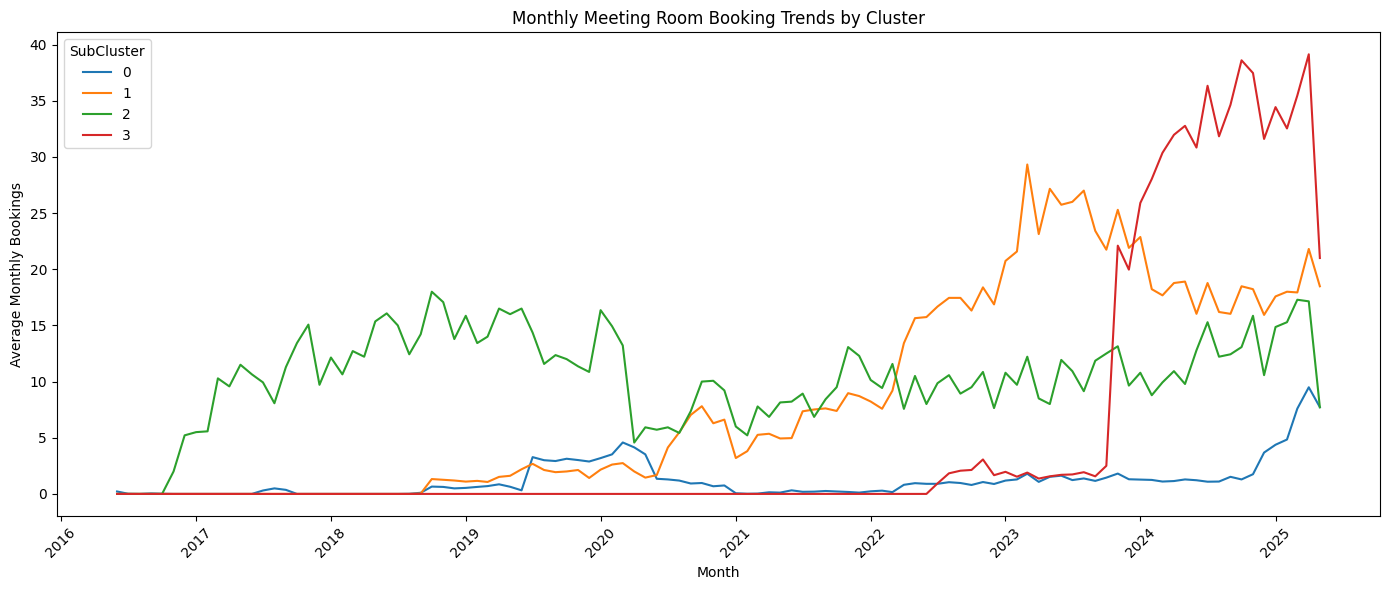

In [ ]:
# Melt data for easier plotting
sub_melted = cluster_1.reset_index().melt(
    id_vars=['BookableUnit_Id', 'SubCluster'],
    value_vars=MR.columns,
    var_name='Month',
    value_name='Monthly_Bookings'
)

# Convert Month from Period to datetime
sub_melted['Month'] = sub_melted['Month'].astype(str)
sub_melted['Month'] = pd.to_datetime(sub_melted['Month'])

# Plot: average monthly bookings per cluster
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=sub_melted,
    x='Month',
    y='Monthly_Bookings',
    hue='SubCluster',
    estimator='mean',
    ci=None,
    palette='tab10'
)
plt.title('Monthly Meeting Room Booking Trends by Cluster')
plt.xlabel('Month')
plt.ylabel('Average Monthly Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
cluStage1_df.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 270 entries, 17 to 547
Columns: 117 entries, BookableUnit_Name to Cluster
dtypes: category(4), float64(1), int32(1), int64(110), object(1)
memory usage: 272.7+ KB


In [ ]:
# 1. Exclude non-time-series columns explicitly
excluded_cols = ['BookableUnit_Id', 'Cluster', 'active_months', 'total_bookings']
time_series_cols = [col for col in cluStage1_df.columns if col not in excluded_cols and isinstance(col, pd.Period)]

# 2. Identify time-series columns for 2016–2018 and after 2018
cols_2016_2018 = [col for col in time_series_cols if str(col)[:4] in ['2016', '2017', '2018']]
cols_after_2018 = [col for col in time_series_cols if col not in cols_2016_2018]

# 3. Filter units with bookings only in 2016–2018
clu_2016_2018_only = cluStage1_df[
    (cluStage1_df[cols_2016_2018].sum(axis=1) > 0) &
    (cluStage1_df[cols_after_2018].sum(axis=1) == 0)
]


In [ ]:
clu_2016_2018_only['BookableUnit_Name']

,BookableUnit_Name
BookableUnit_Id,
17,Sppt 100 (Hbq 4)-17
18,Sppt 100 (Hbq 6)-18
47,L71 Hpsayzwlsu Sppt 1-47


In [ ]:
# 1. Identify time-series columns (which are pandas.Period)
time_series_cols = [col for col in cluStage1_df.columns
                    if isinstance(col, pd.Period)]

# 2. Split into <=2019 and >2019
cols_up_to_2019 = [col for col in time_series_cols if col.year <= 2019]
cols_after_2019 = [col for col in time_series_cols if col.year > 2019]

# 3. Filter: Bookable units active ONLY up to 2019
clu_end_2019_only = cluStage1_df[
    (cluStage1_df[cols_up_to_2019].sum(axis=1) > 0) &
    (cluStage1_df[cols_after_2019].sum(axis=1) == 0)
]

# -------- For 2020 --------

# 4. Split into <=2020 and >2020
cols_up_to_2020 = [col for col in time_series_cols if col.year <= 2020]
cols_after_2020 = [col for col in time_series_cols if col.year > 2020]

# 5. Filter: Bookable units active ONLY up to 2020
clu_end_2020_only = cluStage1_df[
    (cluStage1_df[cols_up_to_2020].sum(axis=1) > 0) &
    (cluStage1_df[cols_after_2020].sum(axis=1) == 0)
]


In [ ]:
clu_end_2019_only['BookableUnit_Name']

,BookableUnit_Name
BookableUnit_Id,
17,Sppt 100 (Hbq 4)-17
18,Sppt 100 (Hbq 6)-18
47,L71 Hpsayzwlsu Sppt 1-47
40,L45 Okbtlsbwlps Sppt 4-40
192,Hpsayzwlsu Sppt (Sppt 101)-192
294,Cswv Sppt (6) (tyaw rbebwv lj svvhvh nf YQC)-294


In [ ]:
clu_end_2020_only['BookableUnit_Name']

,BookableUnit_Name
BookableUnit_Id,
17,Sppt 100 (Hbq 4)-17
18,Sppt 100 (Hbq 6)-18
47,L71 Hpsayzwlsu Sppt 1-47
40,L45 Okbtlsbwlps Sppt 4-40
192,Hpsayzwlsu Sppt (Sppt 101)-192
283,Jswvirlvm Sppt 1-283
296,Hzlsle Sppt 1 (4)-296
297,Hzlsle Sppt 2 (4)-297
298,Hzlsle Sppt 3 (4)-298


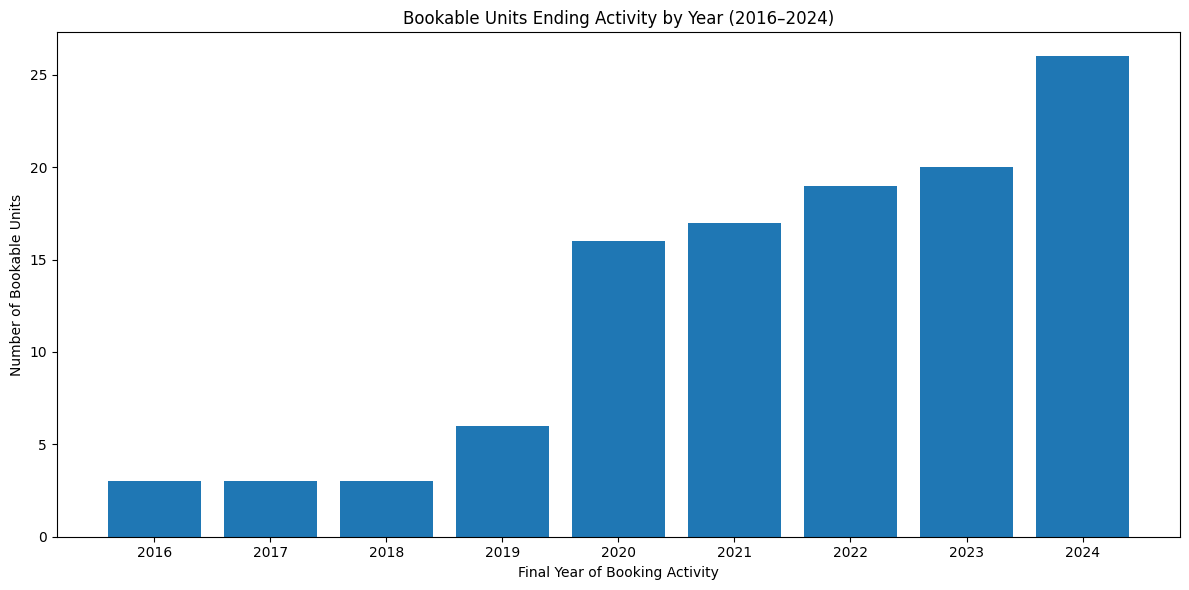

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Extract time-series columns (Period or datetime-like)
time_series_cols = [col for col in cluStage1_df.columns if isinstance(col, (pd.Period, pd.Timestamp))]

# 2. Create dict to hold units ending in each year
clu_by_end_year = {}

# 3. Iterate over years 2016 to 2024
for year in range(2016, 2025):
    cols_before = [col for col in time_series_cols if col.year <= year]
    cols_after = [col for col in time_series_cols if col.year > year]

    df_year = cluStage1_df[
        (cluStage1_df[cols_before].sum(axis=1) > 0) &  # Had bookings before or in this year
        (cluStage1_df[cols_after].sum(axis=1) == 0)     # No bookings after this year
    ]

    clu_by_end_year[year] = df_year

# 4. Count units per year
clu_end_counts = {year: len(df) for year, df in clu_by_end_year.items()}

# 5. Plot
plt.figure(figsize=(12, 6))
plt.bar(clu_end_counts.keys(), clu_end_counts.values())
plt.xlabel("Final Year of Booking Activity")
plt.ylabel("Number of Bookable Units")
plt.title("Bookable Units Ending Activity by Year (2016–2024)")
plt.xticks(list(clu_end_counts.keys()))
plt.tight_layout()
plt.show()


In [ ]:
clu_by_end_year[2021]

,BookableUnit_Name,Building_Name,District_Title,Equipment_Title,BookableUnit_Capacity,BookableUnitType_Title,2016-06,2016-07,2016-08,2016-09,...,2024-11,2024-12,2025-01,2025-02,2025-03,2025-04,2025-05,Active_Months,Total_Bookings,Cluster
BookableUnit_Id,,,,,,,,,,,,,,,,,,,,,
17,Sppt 100 (Hbq 4)-17,Nbimxozjyq bpq Tjykbpmjp Vaimyawm Pjirambx-4,Y hkgzlkh-3,Whiteboard,4.0,Meeting Room,14,0,0,0,...,0,0,0,0,0,0,0,1,14,1
18,Sppt 100 (Hbq 6)-18,Nbimxozjyq bpq Tjykbpmjp Vaimyawm Pjirambx-4,Y hkgzlkh-3,"Flipboard, Whiteboard, Cisco Conference Phone",6.0,Meeting Room,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1
47,L71 Hpsayzwlsu Sppt 1-47,Toe Mmyoom Pobxmg Nopmyo-8,Nngvhlpt-5,"Examination Couch, PC",3.0,Meeting Room,0,1,0,1,...,0,0,0,0,0,0,0,3,3,1
40,L45 Okbtlsbwlps Sppt 4-40,Toe Mmyoom Pobxmg Nopmyo-8,Nngvhlpt-5,"Examination Couch, PC, Telephone",3.0,Meeting Room,0,0,0,0,...,0,0,0,0,0,0,0,25,500,1
192,Hpsayzwlsu Sppt (Sppt 101)-192,Drjxxj Njlym Aoqawbx Nopmyo-17,Nngvhlpt-5,"Chairs/Small Table, Desk, Examination Couch, Sink",4.0,Meeting Room,0,0,0,0,...,0,0,0,0,0,0,0,13,36,1
283,Jswvirlvm Sppt 1-283,Raoxqgobq Pjirambx-19,Hnfpuyplq-4,Unknown,1.0,Meeting Room,0,0,0,0,...,0,0,0,0,0,0,0,23,216,1
296,Hzlsle Sppt 1 (4)-296,Oyaoimxon Xpam-13,Dnlqpgqnlp & Zygflpph-6,"Cisco Conference Phone, Desk, PC",4.0,Meeting Room,0,0,0,0,...,0,0,0,0,0,0,0,11,256,1
297,Hzlsle Sppt 2 (4)-297,Oyaoimxon Xpam-13,Dnlqpgqnlp & Zygflpph-6,"Desk, PC, Telephone, Cisco Conference Phone",4.0,Meeting Room,0,0,0,0,...,0,0,0,0,0,0,0,11,289,1
298,Hzlsle Sppt 3 (4)-298,Oyaoimxon Xpam-13,Dnlqpgqnlp & Zygflpph-6,"Cisco Conference Phone, Desk, PC",4.0,Meeting Room,0,0,0,0,...,0,0,0,0,0,0,0,11,193,1


In [ ]:
#Use create column that classify unit into quartile based on their total bookings
quartile_labels = ['Q1 (Lowest)', 'Q2', 'Q3', 'Q4 (Highest)']

# Create quartile column with meaningful labels
cluStage1_df['Booking_Quartile'] = pd.qcut(
    cluStage1_df['Total_Bookings'], q=4, labels=quartile_labels
)

# Preview
cluStage1_df[['Total_Bookings', 'Booking_Quartile']].head()


,Total_Bookings,Booking_Quartile
BookableUnit_Id,,
17,14,Q1 (Lowest)
18,1,Q1 (Lowest)
47,3,Q1 (Lowest)
37,2924,Q4 (Highest)
30,4375,Q4 (Highest)


/tmp/ipython-input-287984971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


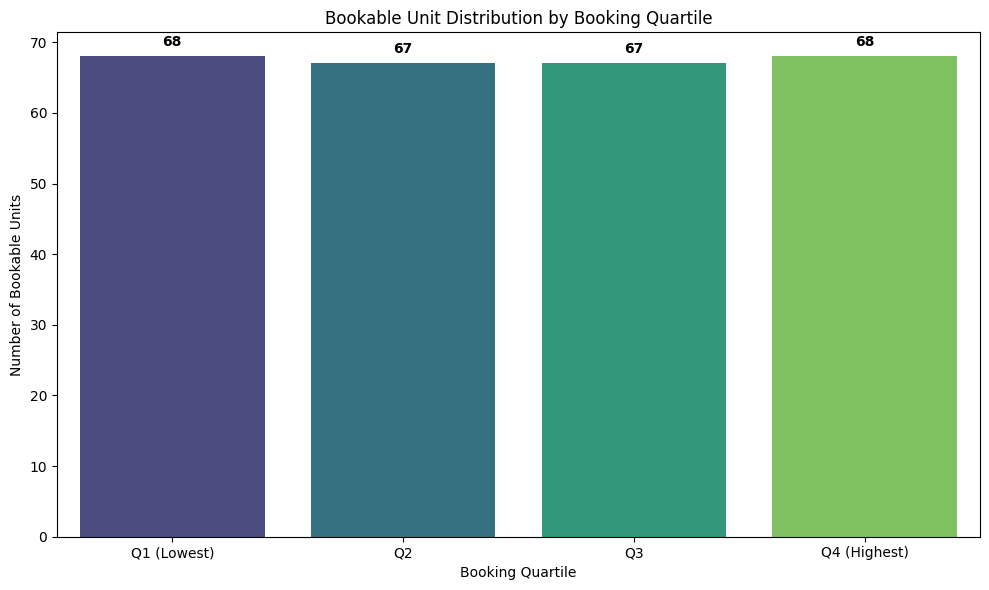

In [ ]:
#Above plot
# Count of bookable units in each quartile
quartile_dist = cluStage1_df['Booking_Quartile'].value_counts().reindex(quartile_labels)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=quartile_dist.index,
    y=quartile_dist.values,
    palette='viridis'
)

# Add value labels on bars
for i, v in enumerate(quartile_dist.values):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontweight='bold')

plt.title('Bookable Unit Distribution by Booking Quartile')
plt.xlabel('Booking Quartile')
plt.ylabel('Number of Bookable Units')
plt.tight_layout()
plt.show()




/tmp/ipython-input-7589272.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quartile_counts = cluStage1_df.groupby(['Building_Name', 'Booking_Quartile']).size().reset_index(name='Count')


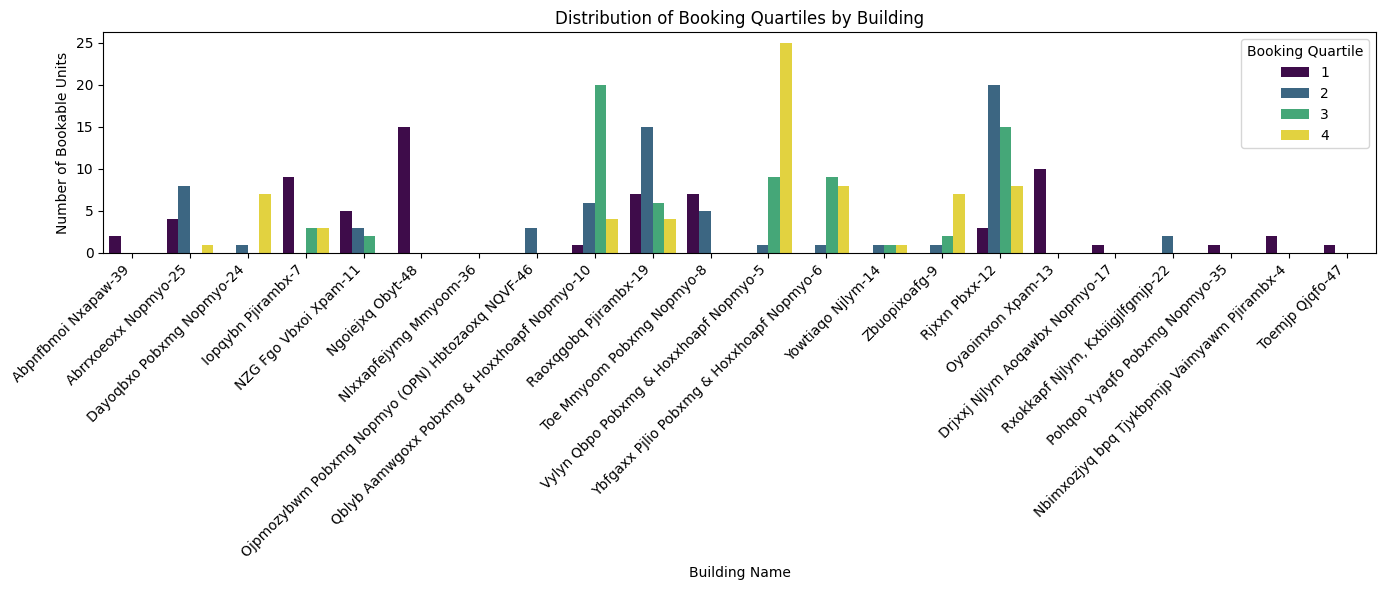

In [ ]:
#use classification by building
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Booking_Quartile is present and numeric
cluStage1_df['Booking_Quartile'] = pd.qcut(
    cluStage1_df['Total_Bookings'], q=4, labels=[1, 2, 3, 4]
).astype(int)

# Count of bookable units per Building and Quartile
quartile_counts = cluStage1_df.groupby(['Building_Name', 'Booking_Quartile']).size().reset_index(name='Count')

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(
    data=quartile_counts,
    x='Building_Name',
    y='Count',
    hue='Booking_Quartile',
    palette='viridis'
)

plt.title('Distribution of Booking Quartiles by Building')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Building Name')
plt.ylabel('Number of Bookable Units')
plt.legend(title='Booking Quartile')
plt.tight_layout()
plt.show()


LIFE CYCLE CATEGORIZATION

In [ ]:
cluStage1_df.head()

,BookableUnit_Name,Building_Name,District_Title,Equipment_Title,BookableUnit_Capacity,BookableUnitType_Title,2016-06,2016-07,2016-08,2016-09,...,2024-12,2025-01,2025-02,2025-03,2025-04,2025-05,Active_Months,Total_Bookings,Cluster,Booking_Quartile
BookableUnit_Id,,,,,,,,,,,,,,,,,,,,,
17,Sppt 100 (Hbq 4)-17,Nbimxozjyq bpq Tjykbpmjp Vaimyawm Pjirambx-4,Y hkgzlkh-3,Whiteboard,4.0,Meeting Room,14,0,0,0,...,0,0,0,0,0,0,1,14,1,1
18,Sppt 100 (Hbq 6)-18,Nbimxozjyq bpq Tjykbpmjp Vaimyawm Pjirambx-4,Y hkgzlkh-3,"Flipboard, Whiteboard, Cisco Conference Phone",6.0,Meeting Room,1,0,0,0,...,0,0,0,0,0,0,1,1,1,1
47,L71 Hpsayzwlsu Sppt 1-47,Toe Mmyoom Pobxmg Nopmyo-8,Nngvhlpt-5,"Examination Couch, PC",3.0,Meeting Room,0,1,0,1,...,0,0,0,0,0,0,3,3,1,1
37,Xpiwzvf Yvvwlsu Sppt (6)-37,Iopqybn Pjirambx-7,Nngvhlpt-5,Unknown,6.0,Meeting Room,0,0,1,0,...,37,41,37,43,36,21,96,2924,0,4
30,Hpsayzwlsu Sppt 01-30,Ybfgaxx Pjlio Pobxmg & Hoxxhoapf Nopmyo-6,Hnfpuyplq-4,"Flipboard, Whiteboard, Cisco Conference Phone,...",2.0,Meeting Room,0,0,1,0,...,41,50,47,50,50,35,96,4375,0,4


Use all from here


/tmp/ipython-input-2963902248.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  usage_stats = df_long.groupby("BookableUnit_Id").agg(
/tmp/ipython-input-2963902248.py:77: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for unit_id, group in df_long.groupby("BookableUnit_Id"):


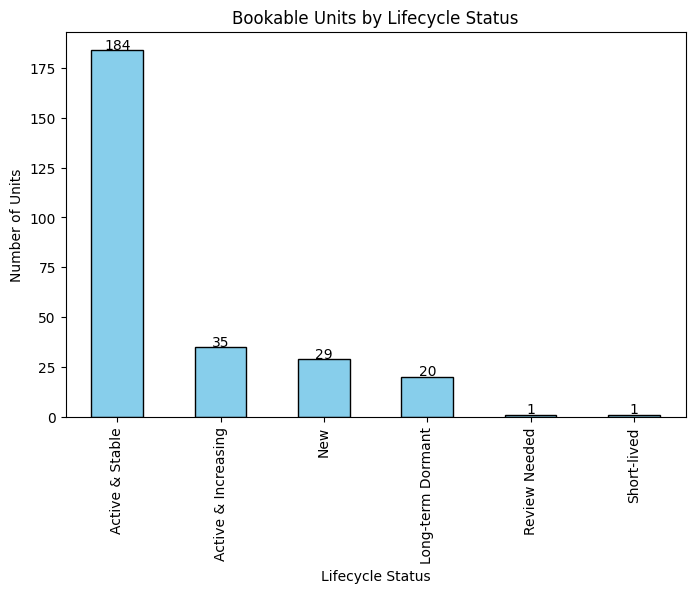

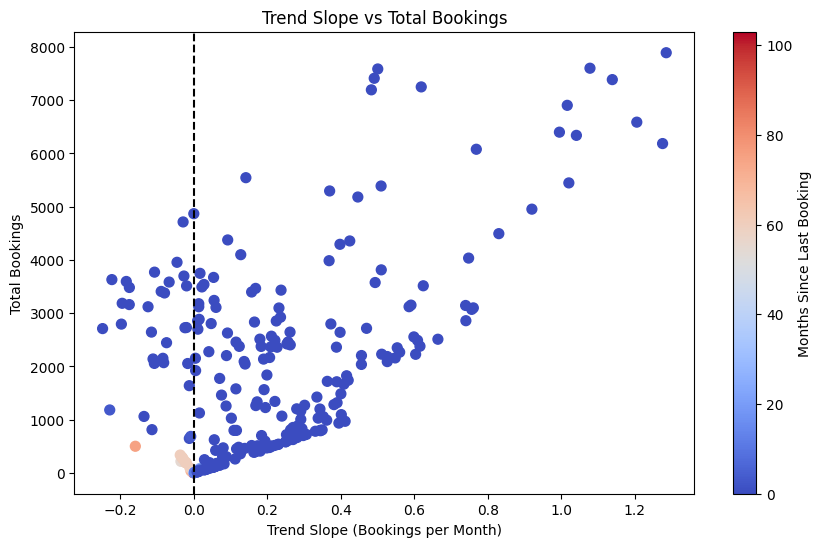

Deprecate list shape: (21, 20)
Review list shape: (1, 20)
Keep list shape: (248, 20)


In [ ]:

from sklearn.linear_model import LinearRegression
# ---------------------------
# Step 1: Reset index so ID becomes a column
# ---------------------------
df = cluStage1_df.reset_index()

# ---------------------------
# Step 2: Identify monthly booking columns (YYYY-MM format)
# ---------------------------
monthly_cols = [col for col in df.columns if str(col).startswith(('20')) and '-' in str(col)]

# Meta (non-monthly) columns
lc_meta_cols = [c for c in df.columns if c not in monthly_cols]

# ---------------------------
# Step 3: Melt to long format
# ---------------------------
df_long = df.melt(
    id_vars=[col for col in df.columns if col not in monthly_cols],
    value_vars=monthly_cols,
    var_name='month',
    value_name='bookings'
)


# Convert month to datetime
df_long["month"] = pd.to_datetime(df_long["month"], format="%Y-%m", errors="coerce")

# ---- STEP 2: Usage stats per BookableUnit_Id ----
usage_stats = df_long.groupby("BookableUnit_Id").agg(
    first_booking=("month", lambda x: x[df_long.loc[x.index, "bookings"] > 0].min()),
    last_booking=("month", lambda x: x[df_long.loc[x.index, "bookings"] > 0].max()),
    total_bookings=("bookings", "sum"),
    active_months=("bookings", lambda x: (x > 0).sum())
).reset_index()

today = pd.Timestamp.today()
fixed_period = pd.Period('2025-05', freq='M')

# ---- STEP 2.1: Months since last booking ----
def months_since_last_fn(last_date):
    if pd.isna(last_date):
        return np.nan
    #return (today.to_period("M") - last_date.to_period("M")).n
    diff = fixed_period - last_date.to_period("M")
    return diff.n





def usage_duration_fn(first_date, last_date):
    if pd.isna(first_date) or pd.isna(last_date):
        return np.nan
    return (last_date.to_period("M") - first_date.to_period("M")).n + 1

usage_stats["months_since_last"] = usage_stats["last_booking"].apply(months_since_last_fn)
usage_stats["usage_duration_months"] = usage_stats.apply(
    lambda row: usage_duration_fn(row["first_booking"], row["last_booking"]),
    axis=1
)


def safe_usage_duration(first_date, last_date):
    if pd.isna(first_date) or pd.isna(last_date):
        return np.nan
    return (last_date.to_period("M") - first_date.to_period("M")).n + 1

usage_stats["usage_duration_months"] = usage_stats.apply(
    lambda row: safe_usage_duration(row["first_booking"], row["last_booking"]),
    axis=1
)


# ---- STEP 3: Trend Analysis ----
trend_results = []
for unit_id, group in df_long.groupby("BookableUnit_Id"):
    group = group.sort_values("month")
    y = group["bookings"].values
    X = np.arange(len(group)).reshape(-1, 1)
    if np.count_nonzero(y) >= 3:  # Enough data points
        model = LinearRegression().fit(X, y)
        slope = model.coef_[0]
    else:
        slope = np.nan
    trend_results.append({"BookableUnit_Id": unit_id, "slope": slope})

trend_df = pd.DataFrame(trend_results)
usage_stats = usage_stats.merge(trend_df, on="BookableUnit_Id", how="left")

# ---- STEP 4: Lifecycle Classification ----
conditions = [
    (usage_stats["months_since_last"] > 24),  # Long-term Dormant
    (usage_stats["usage_duration_months"] < 12) & (usage_stats["months_since_last"] > 12),  # Short-lived
    (usage_stats["months_since_last"] > 12),  # Dormant
    (usage_stats["usage_duration_months"] <= 12) & (usage_stats["months_since_last"] <= 12),  # New
    (usage_stats["slope"] < -0.5),  # Declining
    (usage_stats["slope"] > 0.5),  # Increasing
    (usage_stats["slope"].between(-0.5, 0.5))  # Stable
]

choices = [
    "Long-term Dormant",
    "Short-lived",
    "Dormant",
    "New",
    "Declining",
    "Active & Increasing",
    "Active & Stable"
]

usage_stats["lifecycle_status"] = np.select(conditions, choices, default="Review Needed")

# ---- STEP 5: Deprecation Decision ----
usage_stats["deprecation_decision"] = usage_stats["lifecycle_status"].map({
    "Long-term Dormant": "Deprecate",
    "Short-lived": "Deprecate",
    "Dormant": "Review",
    "Declining": "Review",
    "New": "Keep",
    "Active & Increasing": "Keep",
    "Active & Stable": "Keep",
    "Review Needed": "Review"
})

# ---- STEP 6: Merge back to metadata ----
final_lifecycle_df = df[lc_meta_cols].drop_duplicates().merge(
    usage_stats, on="BookableUnit_Id", how="left"
)

# ---- STEP 7: Visualisations ----
plt.figure(figsize=(8, 5))
final_lifecycle_df["lifecycle_status"].value_counts().plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Bookable Units by Lifecycle Status")
plt.xlabel("Lifecycle Status")
plt.ylabel("Number of Units")
for i, val in enumerate(final_lifecycle_df["lifecycle_status"].value_counts()):
    plt.text(i, val + 0.5, str(val), ha="center")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(final_lifecycle_df["slope"], final_lifecycle_df["total_bookings"],
            c=final_lifecycle_df["months_since_last"], cmap="coolwarm", s=50)
plt.axvline(0, color="black", linestyle="--")
plt.colorbar(label="Months Since Last Booking")
plt.xlabel("Trend Slope (Bookings per Month)")
plt.ylabel("Total Bookings")
plt.title("Trend Slope vs Total Bookings")
plt.show()

# ---- STEP 8: Output lists ----
deprecation_list = final_lifecycle_df[final_lifecycle_df["deprecation_decision"] == "Deprecate"]
review_list = final_lifecycle_df[final_lifecycle_df["deprecation_decision"] == "Review"]
keep_list = final_lifecycle_df[final_lifecycle_df["deprecation_decision"] == "Keep"]

print("Deprecate list shape:", deprecation_list.shape)
print("Review list shape:", review_list.shape)
print("Keep list shape:", keep_list.shape)


In [ ]:
df.head()

In [ ]:
# Select only the columns needed for the join
df_subset = df[["BookableUnit_Id", "Cluster", "Booking_Quartile","BookableUnit_Name",	"Building_Name","District_Title"]]

# Inner join on BookableUnit_Id
usage_stats_joined = usage_stats.merge(
    df_subset,
    on="BookableUnit_Id",
    how="inner"
)

# Optional: set index back
#usage_stats_joined = usage_stats_joined.set_index("BookableUnit_Id")


In [ ]:
usage_stats_joined['Cluster_name'] = usage_stats_joined['Cluster'].map({
    0: 'Middle-0',
    1: 'Low-1',
    2: 'High-2'

})

In [ ]:
usage_stats_joined['Quartile_name'] = usage_stats_joined['Booking_Quartile'].map({
    1: "Q1 (Lowest 25%)",
    2: "Q2 (25%–49%)",
    3: "Q3 (50%–74%)",
    4: "Q4 (Top 25%)"
})

In [ ]:
usage_stats_joined.head()

,BookableUnit_Id,first_booking,last_booking,total_bookings,active_months,months_since_last,usage_duration_months,slope,lifecycle_status,deprecation_decision,Cluster,Booking_Quartile,BookableUnit_Name,Building_Name,District_Title,Cluster_name,Quartile_name
0,17,2016-06-01,2016-06-01,14,1,107.0,1.0,NaN,Long-term Dormant,Deprecate,1,1,Sppt 100 (Hbq 4)-17,Nbimxozjyq bpq Tjykbpmjp Vaimyawm Pjirambx-4,Y hkgzlkh-3,Low-1,Q1 (Lowest 25%)
1,18,2016-06-01,2016-06-01,1,1,107.0,1.0,NaN,Long-term Dormant,Deprecate,1,1,Sppt 100 (Hbq 6)-18,Nbimxozjyq bpq Tjykbpmjp Vaimyawm Pjirambx-4,Y hkgzlkh-3,Low-1,Q1 (Lowest 25%)
2,24,2017-01-01,2025-05-01,3770,97,0.0,101.0,-0.106729,Active & Stable,Keep,0,4,Hpsayzwlsu Sppt 01-24,Vylyn Qbpo Pobxmg & Hoxxhoapf Nopmyo-5,Hnfpuyplq-4,Middle-0,Q4 (Top 25%)
3,30,2016-08-01,2025-05-01,4375,96,0.0,106.0,0.092415,Active & Stable,Keep,0,4,Hpsayzwlsu Sppt 01-30,Ybfgaxx Pjlio Pobxmg & Hoxxhoapf Nopmyo-6,Hnfpuyplq-4,Middle-0,Q4 (Top 25%)
4,33,2017-04-01,2025-05-01,3097,93,0.0,98.0,0.231878,Active & Stable,Keep,0,4,Fpbihippt (22)-33,Iopqybn Pjirambx-7,Nngvhlpt-5,Middle-0,Q4 (Top 25%)


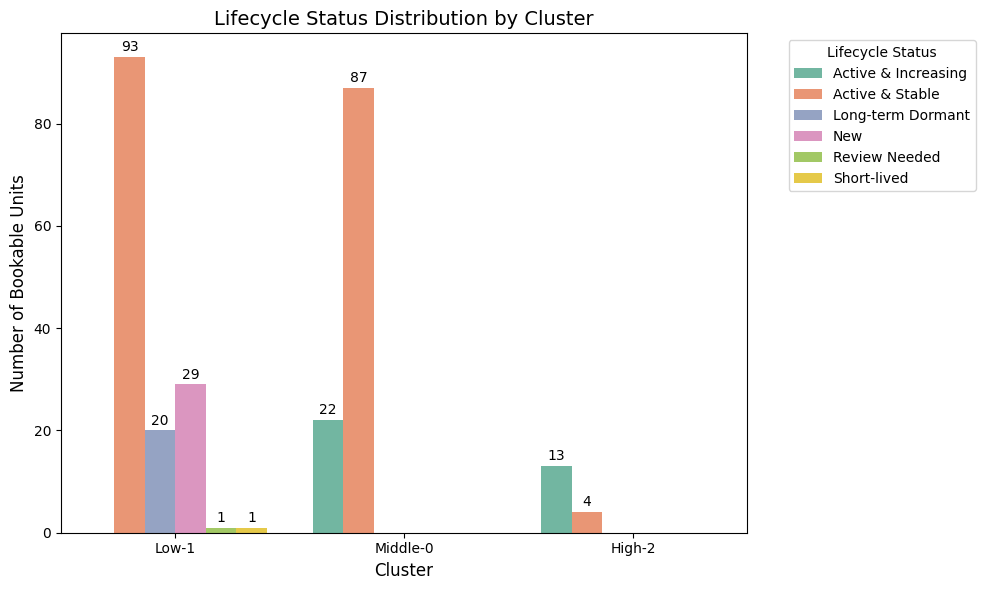

In [ ]:


# Ensure lifecycle_status is categorical
usage_stats_joined["lifecycle_status"] = usage_stats_joined["lifecycle_status"].astype("category")

plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=usage_stats_joined.reset_index(),
    x="Cluster_name",
    hue="lifecycle_status",
    palette="Set2"
)

# Add count labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=2)

plt.title("Lifecycle Status Distribution by Cluster", fontsize=14)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Number of Bookable Units", fontsize=12)
plt.legend(title="Lifecycle Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


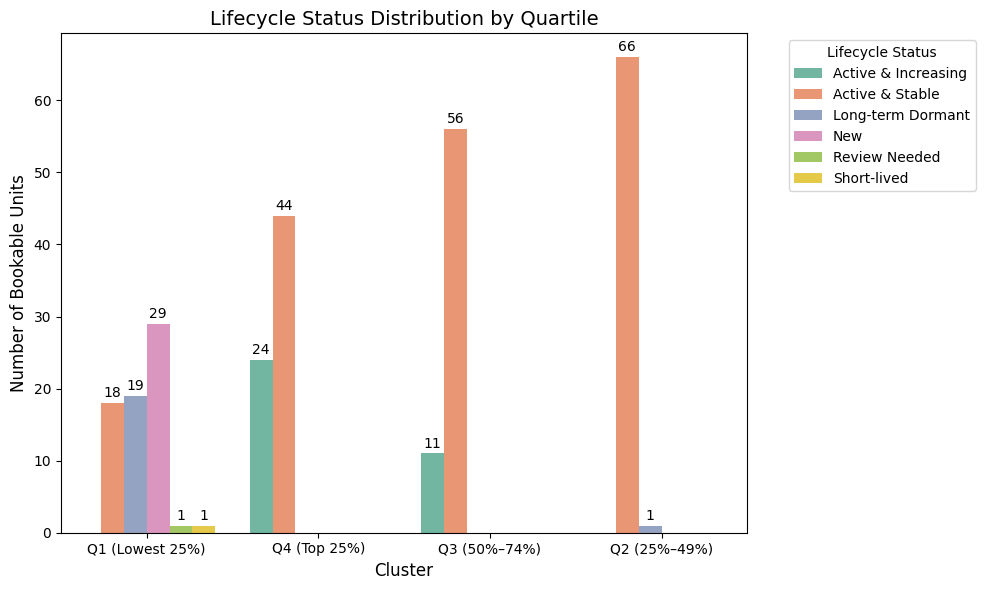

In [ ]:

# Ensure lifecycle_status is categorical
usage_stats_joined["lifecycle_status"] = usage_stats_joined["lifecycle_status"].astype("category")

plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=usage_stats_joined.reset_index(),
    x="Quartile_name",
    hue="lifecycle_status",
    palette="Set2"
)

# Add count labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=2)

plt.title("Lifecycle Status Distribution by Quartile", fontsize=14)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Number of Bookable Units", fontsize=12)
plt.legend(title="Lifecycle Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


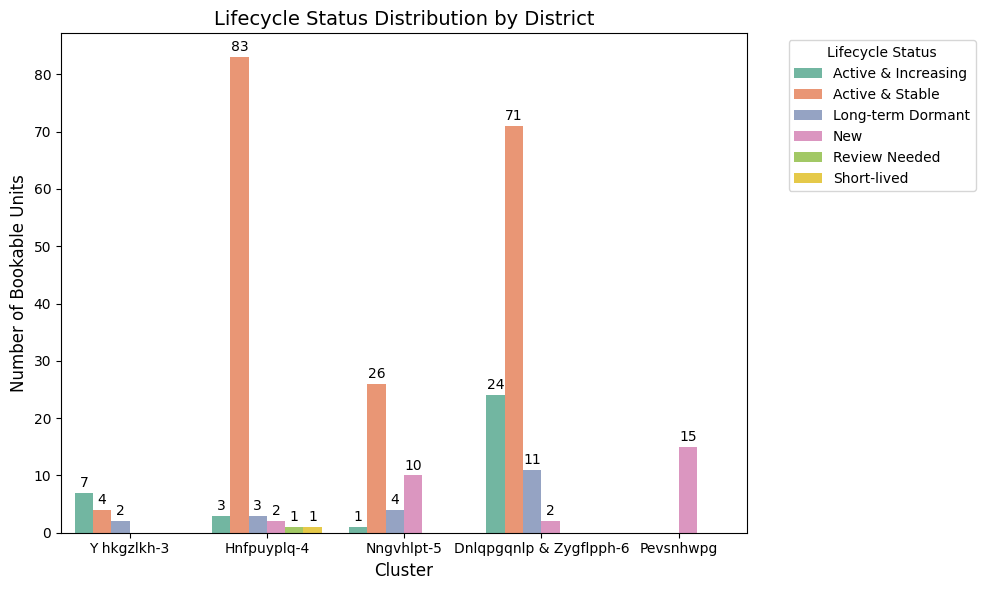

In [ ]:
# Ensure lifecycle_status is categorical
#usage_stats_joined["lifecycle_status"] = usage_stats_joined["lifecycle_status"].astype("category")

plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=usage_stats_joined.reset_index(),
    x="District_Title",
    hue="lifecycle_status",
    palette="Set2"
)

# Add count labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=2)

plt.title("Lifecycle Status Distribution by District", fontsize=14)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Number of Bookable Units", fontsize=12)
plt.legend(title="Lifecycle Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/tmp/ipython-input-2261121191.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


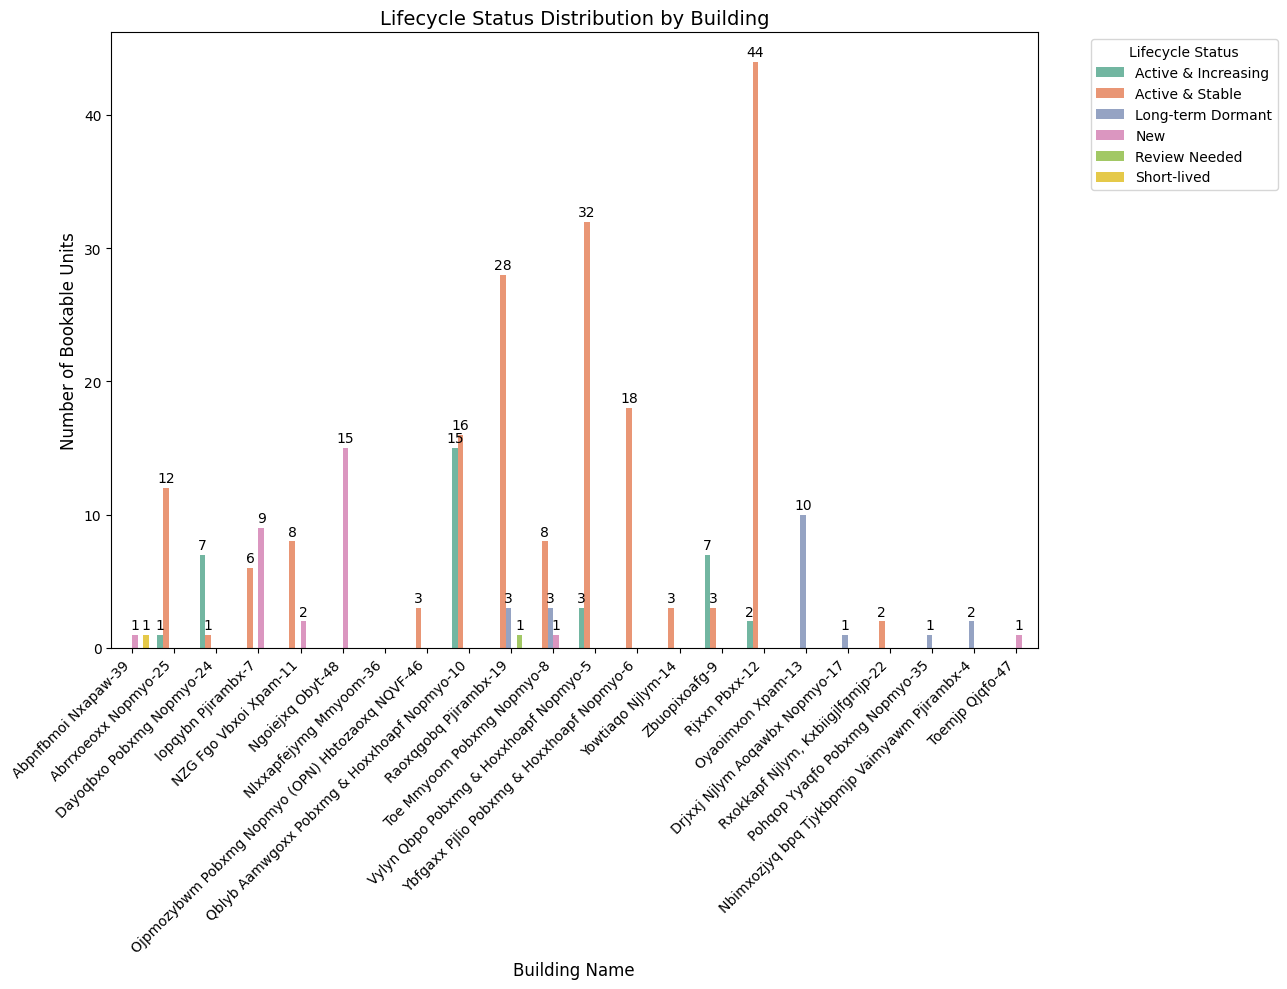

In [ ]:
plt.figure(figsize=(13, 10))
ax = sns.countplot(
    data=usage_stats_joined.reset_index(),
    x="Building_Name",
    hue="lifecycle_status",
    palette="Set2"
)

# Rotate building names to avoid overlap
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add count labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=2)

plt.title("Lifecycle Status Distribution by Building", fontsize=14)
plt.xlabel("Building Name", fontsize=12)
plt.ylabel("Number of Bookable Units", fontsize=12)
plt.legend(title="Lifecycle Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



End


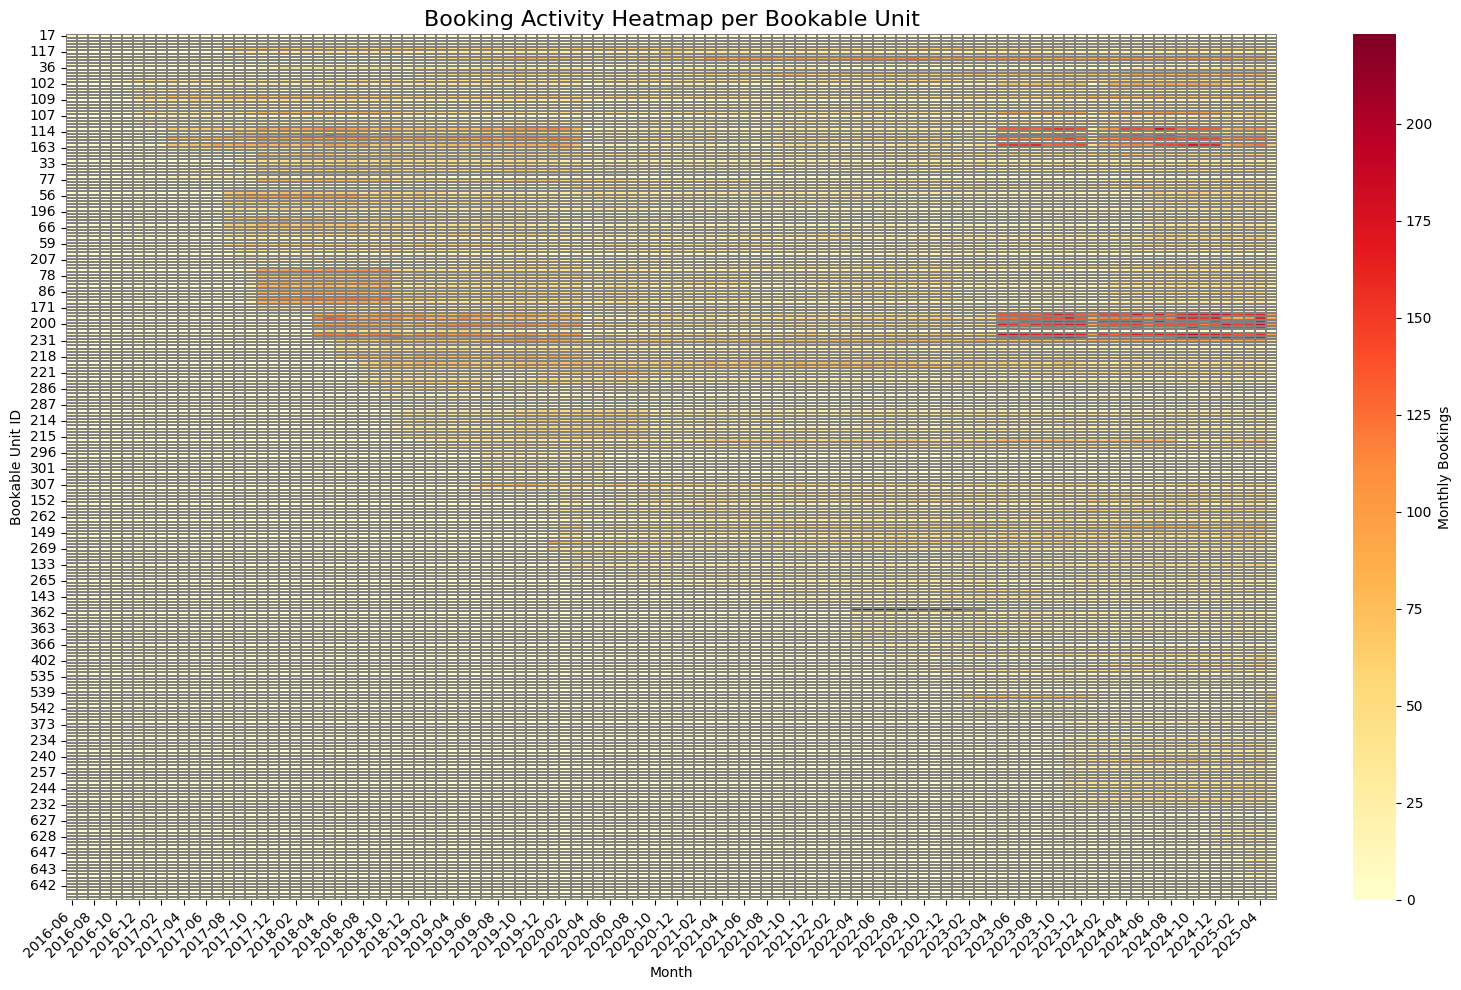

In [ ]:

# Ensure monthly columns are sorted by date
monthly_cols_sorted = sorted(monthly_cols, key=lambda x: pd.to_datetime(x, format="%Y-%m"))

# Create matrix for heatmap
heatmap_data = df.set_index("BookableUnit_Id")[monthly_cols_sorted]

# Optional: Sort rows by first booking date for better pattern visibility
first_booking_order = heatmap_data.apply(lambda row: row.ne(0).idxmax() if row.sum() > 0 else None, axis=1)
first_booking_order = pd.to_datetime(first_booking_order, format="%Y-%m", errors="coerce")
heatmap_data = heatmap_data.loc[first_booking_order.sort_values().index]

# Plot heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(
    heatmap_data,
    cmap="YlOrRd",
    cbar_kws={'label': 'Monthly Bookings'},
    linewidths=0.1,
    linecolor='gray'
)
plt.title("Booking Activity Heatmap per Bookable Unit", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Bookable Unit ID")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Select only the columns needed for the join


# Subset dataframe
df_subset = df[["BookableUnit_Id", "Cluster", "Booking_Quartile"] + monthly_cols_sorted]


# Inner join on BookableUnit_Id
usage_stats_joined_MR = usage_stats.merge(
    df_subset,
    on="BookableUnit_Id",
    how="inner"
)


In [ ]:


## Ensure all monthly columns are strings in the dataframe itself
df_fixed = usage_stats_joined_MR.copy()
df_fixed.columns = [str(c) if c in monthly_cols else c for c in df_fixed.columns]

# Convert monthly cols to string and sort
monthly_cols_str = [str(c) for c in monthly_cols]
monthly_cols_sorted = sorted(monthly_cols_str, key=lambda x: pd.to_datetime(x, format="%Y-%m"))

# Sort by lifecycle category & first booking
df_sorted = df_fixed.copy()
df_sorted["first_booking"] = df_sorted[monthly_cols_sorted].apply(
    lambda row: pd.to_datetime(row.ne(0).idxmax(), format="%Y-%m", errors="coerce")
    if row.sum() > 0 else pd.NaT, axis=1
)
df_sorted = df_sorted.sort_values(["lifecycle_status", "first_booking"], na_position="last")

# Heatmap data
heatmap_data = df_sorted.set_index("BookableUnit_Id")[monthly_cols_sorted]

# Lifecycle color mapping
import seaborn as sns
import matplotlib.pyplot as plt

lifecycle_palette = sns.color_palette("Set2", n_colors=df_sorted["lifecycle_status"].nunique())
lifecycle_map = dict(zip(df_sorted["lifecycle_status"].cat.categories, lifecycle_palette))
lifecycle_colors = df_sorted["lifecycle_status"].map(lifecycle_map).to_numpy()

# Plot
fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(
    heatmap_data,
    cmap="YlGnBu",
    cbar_kws={'label': 'Monthly Bookings'},
    ax=ax
)

# Color y-axis labels by lifecycle
for ytick, color in zip(ax.get_yticklabels(), lifecycle_colors):
    ytick.set_backgroundcolor(color)

ax.set_title("Lifecycle Heatmap by Bookable Unit", fontsize=18, pad=20)
ax.set_xlabel("Month", fontsize=14)
ax.set_ylabel("Bookable Unit ID", fontsize=14)
plt.tight_layout()
plt.show()


NotImplementedError: isna is not defined for MultiIndex

In [ ]:
act_sta_df = usage_stats_joined[usage_stats_joined["lifecycle_status"] == "Active & Stable"]
act_inc_df = usage_stats_joined[usage_stats_joined["lifecycle_status"] == "Active & Increasing"]
short_df = usage_stats_joined[usage_stats_joined["lifecycle_status"] == "Short-lived"]
lt_dorm_df = usage_stats_joined[usage_stats_joined["lifecycle_status"] == "Long-term Dormant"]
new_df = usage_stats_joined[usage_stats_joined["lifecycle_status"] == "New"]
review_df = usage_stats_joined[usage_stats_joined["lifecycle_status"] == "Review Needed"]

In [ ]:
usage_stats_joined.to_csv('usage_stats_joined.csv', index=False)
act_sta_df.to_csv('act_sta_df.csv', index=False)
act_inc_df.to_csv('act_inc_df.csv', index=False)
short_df.to_csv('short_df.csv', index=False)
lt_dorm_df.to_csv('lt_dorm_df.csv', index=False)
new_df.to_csv('new_df.csv', index=False)
review_df.to_csv('review_df.csv', index=False)

In [ ]:
review_df = review_df.loc[review_df['active_months'] != 0]

In [ ]:
new_df.head()

,BookableUnit_Id,first_booking,last_booking,total_bookings,active_months,months_since_last,usage_duration_months,slope,lifecycle_status,deprecation_decision,Cluster,Booking_Quartile,BookableUnit_Name,Building_Name,District_Title,Cluster_name,Quartile_name
237,547,2025-05-01,2025-05-01,1,1,0.0,1.0,NaN,New,Keep,1,1,HCYQU Utbzz Bjjlev (HJQFGG) (3)-547,Toe Mmyoom Pobxmg Nopmyo-8,Nngvhlpt-5,Low-1,Q1 (Lowest 25%)
239,571,2023-10-01,2024-07-01,6,4,10.0,10.0,0.002315,New,Keep,1,1,Cswv Sppt (4)-571,NZG Fgo Vbxoi Xpam-11,Dnlqpgqnlp & Zygflpph-6,Low-1,Q1 (Lowest 25%)
241,573,2023-11-01,2024-08-01,6,5,9.0,10.0,0.002277,New,Keep,1,1,Xvzznvlsu Sppt (5)-573,NZG Fgo Vbxoi Xpam-11,Dnlqpgqnlp & Zygflpph-6,Low-1,Q1 (Lowest 25%)
243,575,2023-11-01,2024-06-01,4,3,11.0,8.0,0.001477,New,Keep,1,1,WE Dlwegvs X (4)-575,Toemjp Qjqfo-47,Hnfpuyplq-4,Low-1,Q1 (Lowest 25%)
245,593,2024-03-01,2024-07-01,4,2,10.0,5.0,NaN,New,Keep,1,1,Ybsfubwva Yvvwlsu Sppt (4)-593,Abpnfbmoi Nxapaw-39,Hnfpuyplq-4,Low-1,Q1 (Lowest 25%)


In [ ]:

from sklearn.linear_model import LinearRegression

# ---------------------------
# Step 1: Reset index so ID becomes a column
# ---------------------------
df = cluStage1_df.reset_index()

# ---------------------------
# Step 2: Identify monthly booking columns (YYYY-MM format)
# ---------------------------
monthly_cols = [col for col in df.columns if str(col).startswith(('20')) and '-' in str(col)]

# ---------------------------
# Step 3: Melt to long format
# ---------------------------
df_long = df.melt(
    id_vars=[col for col in df.columns if col not in monthly_cols],
    value_vars=monthly_cols,
    var_name='month',
    value_name='bookings'
)

# Ensure month is datetime
df_long['month'] = pd.to_datetime(df_long['month'], format='%Y-%m')

# ---------------------------
# Step 4: Compute usage stats per unit
# ---------------------------
usage_stats = df_long.groupby('BookableUnit_Id').agg(
    first_booking=('month', lambda x: x[df_long.loc[x.index, 'bookings'] > 0].min()),
    last_booking=('month', lambda x: x[df_long.loc[x.index, 'bookings'] > 0].max()),
    total_bookings=('bookings', 'sum'),
    active_months=('bookings', lambda x: (x > 0).sum())
).reset_index()

# ---------------------------
# Step 5: Calculate months since last booking & usage duration
# ---------------------------
current_month = df_long['month'].max()

usage_stats['months_since_last'] = usage_stats['last_booking'].apply(
    lambda d: (current_month.year - d.year) * 12 + (current_month.month - d.month)
    if pd.notna(d) else np.nan
)

usage_stats['usage_duration_months'] = usage_stats.apply(
    lambda row: (row['last_booking'].year - row['first_booking'].year) * 12 +
                (row['last_booking'].month - row['first_booking'].month)
    if pd.notna(row['first_booking']) and pd.notna(row['last_booking']) else np.nan,
    axis=1
)

# ---------------------------
# Step 6: Trend analysis
# ---------------------------
trend_results = []
for unit_id, grp in df_long.groupby('BookableUnit_Id'):
    grp = grp.sort_values('month')
    X = np.arange(len(grp)).reshape(-1, 1)
    y = grp['bookings'].values
    if len(set(y)) > 1:
        model = LinearRegression().fit(X, y)
        slope = model.coef_[0]
    else:
        slope = 0
    trend_results.append((unit_id, slope))

trend_df = pd.DataFrame(trend_results, columns=['BookableUnit_Id', 'trend_slope'])

# ---------------------------
# Step 7: Classify lifecycle
# ---------------------------
def classify_lifecycle(row):
    if pd.isna(row['last_booking']):
        return 'No Bookings'
    if row['months_since_last'] > 12:
        return 'Inactive > 1yr'
    if row['months_since_last'] > 6:
        return 'Inactive 6-12mo'
    if row['trend_slope'] < 0:
        return 'Declining'
    return 'Active'

usage_stats = usage_stats.merge(trend_df, on='BookableUnit_Id', how='left')
usage_stats['lifecycle_status'] = usage_stats.apply(classify_lifecycle, axis=1)

# ---------------------------
# Step 8: Map to deprecation decision
# ---------------------------
decision_map = {
    'No Bookings': 'Deprecate',
    'Inactive > 1yr': 'Deprecate',
    'Inactive 6-12mo': 'Review',
    'Declining': 'Review',
    'Active': 'Keep'
}
usage_stats['deprecation_decision'] = usage_stats['lifecycle_status'].map(decision_map)

# ---------------------------
# Step 9: Merge back with metadata
# ---------------------------
final_lc_df = df.merge(usage_stats, on='BookableUnit_Id', how='left')

# ---------------------------
# Step 10: Output counts
# ---------------------------
print(final_df['deprecation_decision'].value_counts())


/tmp/ipython-input-3643567393.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  usage_stats = df_long.groupby('BookableUnit_Id').agg(
/tmp/ipython-input-3643567393.py:59: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for unit_id, grp in df_long.groupby('BookableUnit_Id'):


deprecation_decision
Keep         213
Review        36
Deprecate     21
Name: count, dtype: int64


TRYING 4 CLUSTERS ON BOOKING DATAFRAME.

In [ ]:
#Kmeans using 4 clusters
optimal1_k = 4

kmeans = KMeans(n_clusters=optimal1_k, random_state=42)
cluster_labels1 = kmeans.fit_predict(MR_scaled)



In [ ]:
MR_clustered_df1 = MR_metadata.copy()
MR_clustered_df1['Cluster'] = cluster_labels1


In [ ]:
MR_clustered_df1.head()

,BookableUnit_Name,Building_Name,District_Title,Equipment_Title,BookableUnit_Capacity,BookableUnitType_Title,Active_Months,Total_Bookings,Cluster
BookableUnit_Id,,,,,,,,,
17,Sppt 100 (Hbq 4)-17,Nbimxozjyq bpq Tjykbpmjp Vaimyawm Pjirambx-4,Y hkgzlkh-3,Whiteboard,4.0,Meeting Room,1,14,1
18,Sppt 100 (Hbq 6)-18,Nbimxozjyq bpq Tjykbpmjp Vaimyawm Pjirambx-4,Y hkgzlkh-3,"Flipboard, Whiteboard, Cisco Conference Phone",6.0,Meeting Room,1,1,1
47,L71 Hpsayzwlsu Sppt 1-47,Toe Mmyoom Pobxmg Nopmyo-8,Nngvhlpt-5,"Examination Couch, PC",3.0,Meeting Room,3,3,1
37,Xpiwzvf Yvvwlsu Sppt (6)-37,Iopqybn Pjirambx-7,Nngvhlpt-5,NaN,6.0,Meeting Room,96,2924,3
30,Hpsayzwlsu Sppt 01-30,Ybfgaxx Pjlio Pobxmg & Hoxxhoapf Nopmyo-6,Hnfpuyplq-4,"Flipboard, Whiteboard, Cisco Conference Phone,...",2.0,Meeting Room,96,4375,3


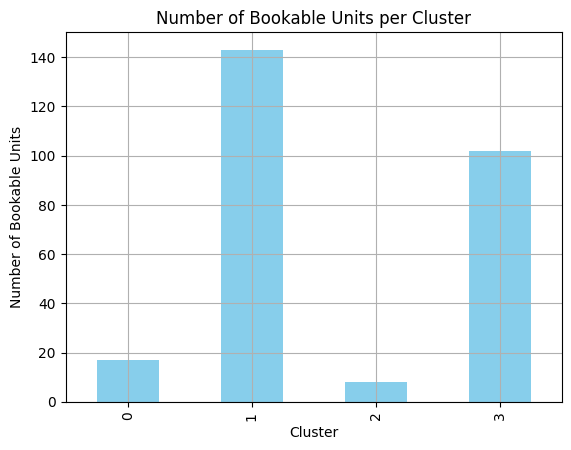

In [ ]:
MR_clustered_df1['Cluster'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Bookable Units')
plt.title('Number of Bookable Units per Cluster')
plt.grid(True)
plt.show()

In [ ]:
cluster1_0 = MR_clustered_df1[MR_clustered_df1['Cluster'] == 0]
cluster1_1 = MR_clustered_df1[MR_clustered_df1['Cluster'] == 1]
cluster1_2 = MR_clustered_df1[MR_clustered_df1['Cluster'] == 2]
cluster1_3 = MR_clustered_df1[MR_clustered_df1['Cluster'] == 3]


In [ ]:
#Cluster 0
min_maxC10 = cluster1_0['Total_Bookings'].agg(['min', 'max'])
print(min_maxC10)

min    4034
max    7891
Name: Total_Bookings, dtype: int64


In [ ]:
min_maxCc10 = cluster1_0['Active_Months'].agg(['min', 'max'])
print(min_maxCc10)

min    78
max    91
Name: Active_Months, dtype: int64


In [ ]:
#Cluster1
min_maxC11 = cluster1_1['Total_Bookings'].agg(['min', 'max'])
print(min_maxC11)

min       1
max    1838
Name: Total_Bookings, dtype: int64


In [ ]:
min_maxCc11 = cluster1_1['Active_Months'].agg(['min', 'max'])
print(min_maxCc11)

min      1
max    103
Name: Active_Months, dtype: int64


In [ ]:
#Cluster2
min_maxC12 = cluster1_2['Total_Bookings'].agg(['min', 'max'])
print(min_maxC12)

min    2794
max    7586
Name: Total_Bookings, dtype: int64


In [ ]:
min_maxCc12 = cluster1_2['Active_Months'].agg(['min', 'max'])
print(min_maxCc12)

min    100
max    103
Name: Active_Months, dtype: int64


In [ ]:
#Cluster3
min_maxC13 = cluster1_3['Total_Bookings'].agg(['min', 'max'])
print(min_maxC13)

min    1461
max    4868
Name: Total_Bookings, dtype: int64


In [ ]:
min_maxCc13 = cluster1_3['Active_Months'].agg(['min', 'max'])
print(min_maxCc13)

min     38
max    103
Name: Active_Months, dtype: int64


In [ ]:
MR_clustered_rates1 = MR.copy()
MR_clustered_rates1['Cluster'] = cluster_labels1


/tmp/ipython-input-983627908.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


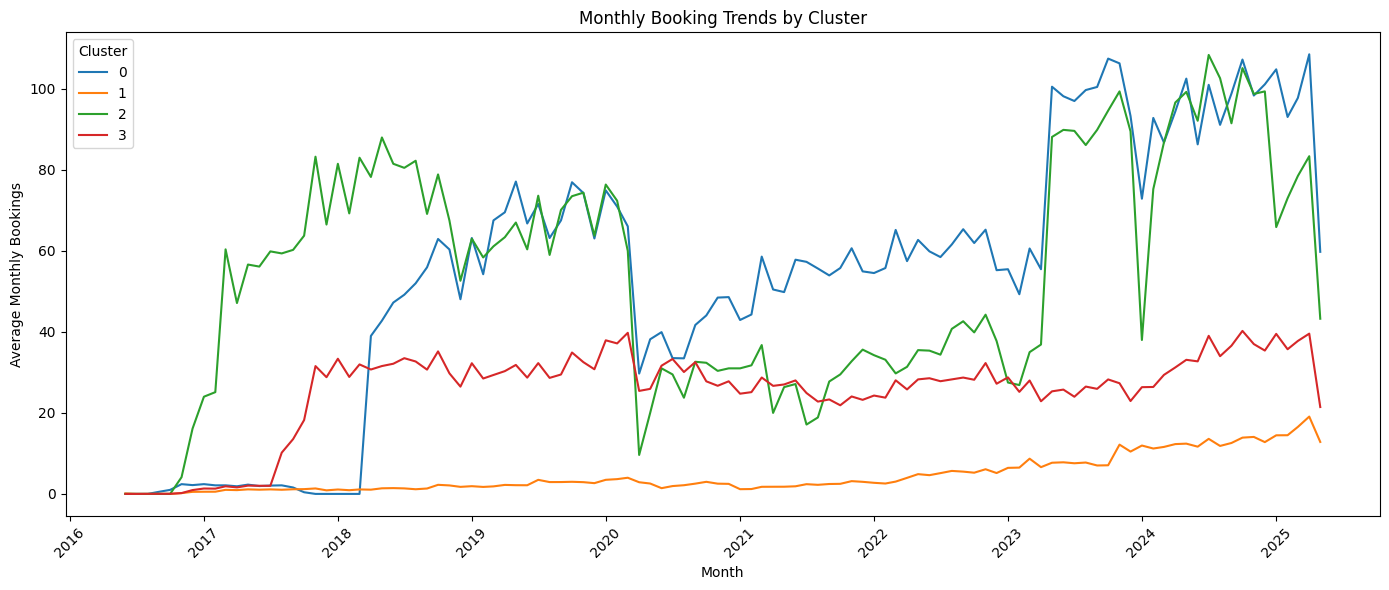

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# pivot data longer for easier plotting
melted1 = MR_clustered_rates1.reset_index().melt(
    id_vars=['BookableUnit_Id', 'Cluster'],
    value_vars=MR.columns,
    var_name='Month',
    value_name='Monthly_Bookings'
)

# Convert Month from Period to datetime
melted1['Month'] = melted1['Month'].astype(str)
melted1['Month'] = pd.to_datetime(melted1['Month'])

# Plot: average monthly bookings per cluster
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=melted1,
    x='Month',
    y='Monthly_Bookings',
    hue='Cluster',
    estimator='mean',
    ci=None,
    palette='tab10'
)
plt.title('Monthly Booking Trends by Cluster')
plt.xlabel('Month')
plt.ylabel('Average Monthly Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
clu1Stage1_df = final_MR_df.copy()
clu1Stage1_df['Cluster'] = cluster_labels1

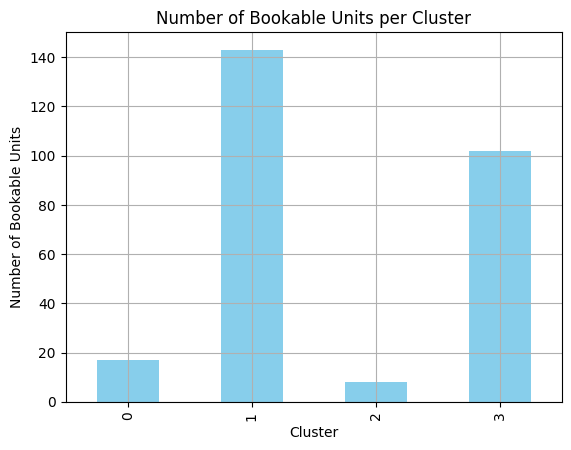

min    1563
max    5388
Name: Total_Bookings, dtype: int64
min    78
max    91
Name: Active_Months, dtype: int64


/tmp/ipython-input-2983242924.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


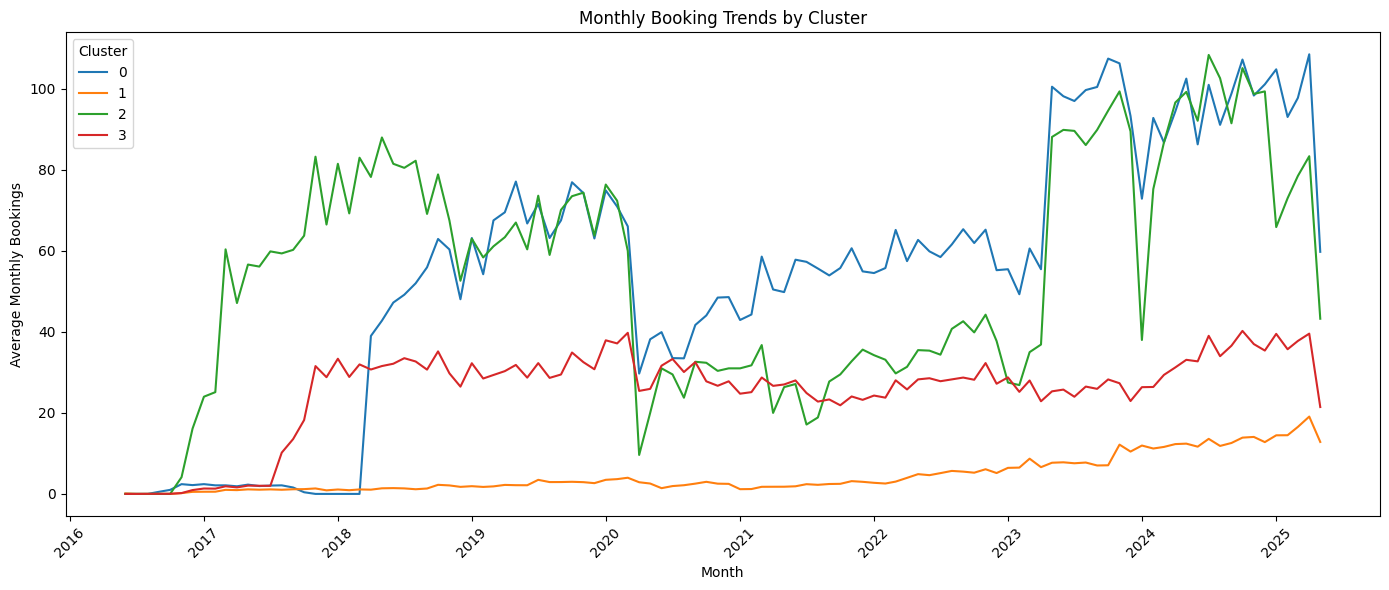

In [ ]:
kmeans1 = KMeans(n_clusters=4, random_state=42)
cluster_labels1 = kmeans.fit_predict(MR_scaled)

MR_clustered_df1 = MR_metadata.copy()
MR_clustered_df1['Cluster'] = cluster_labels1

MR_clustered_df1['Cluster'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Bookable Units')
plt.title('Number of Bookable Units per Cluster')
plt.grid(True)
plt.show()

cluster1_0 = MR_clustered_df1[MR_clustered_df1['Cluster'] == 0]
cluster1_1 = MR_clustered_df1[MR_clustered_df1['Cluster'] == 1]
cluster1_2 = MR_clustered_df1[MR_clustered_df1['Cluster'] == 2]
cluster1_3 = MR_clustered_df1[MR_clustered_df1['Cluster'] == 3]

min_maxC10 = cluster1_0['Total_Bookings'].agg(['min', 'max'])
print(min_maxC0)

min_maxCc10 = cluster1_0['Active_Months'].agg(['min', 'max'])
print(min_maxCc10)

MR_clustered_rates1 = MR.copy()
MR_clustered_rates1['Cluster'] = cluster_labels1

import matplotlib.pyplot as plt
import seaborn as sns

# pivot data longer for easier plotting
melted1 = MR_clustered_rates1.reset_index().melt(
    id_vars=['BookableUnit_Id', 'Cluster'],
    value_vars=MR.columns,
    var_name='Month',
    value_name='Monthly_Bookings'
)

# Convert Month from Period to datetime
melted1['Month'] = melted1['Month'].astype(str)
melted1['Month'] = pd.to_datetime(melted1['Month'])

# Plot: average monthly bookings per cluster
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=melted1,
    x='Month',
    y='Monthly_Bookings',
    hue='Cluster',
    estimator='mean',
    ci=None,
    palette='tab10'
)
plt.title('Monthly Booking Trends by Cluster')
plt.xlabel('Month')
plt.ylabel('Average Monthly Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


cluStage1_df = final_MR_df.copy()
cluStage1_df['Cluster'] = cluster_labels